In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
#%cd /content/drive/MyDrive/

# Home Credit Revolving loans/Cash loans 24か月

In [3]:
import torch
# GPUの名称、CUDA Compute Capabilityを取得
print(torch.cuda.get_device_name())

NVIDIA RTX A2000 Laptop GPU


In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16346750288984504526
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1745276110
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11654112003249768110
 physical_device_desc: "device: 0, name: NVIDIA RTX A2000 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [5]:
import cupy as cp
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn_pandas import DataFrameMapper
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_log_error
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree
from sklearn.datasets import make_moons

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from keras.layers import Dense, Dropout
from keras.models import Sequential

from six import StringIO

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import math
from scipy import stats
import numpy as np
import pandas as pd
import tensorflow as tf

from datetime import datetime
from tensorflow import feature_column
from tensorflow.keras import layers

from tqdm import tqdm

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

print("OK\n")

OK



In [6]:
app_train_origin = pd.read_csv('./home-credit-default-risk/exports/app_train_fillterd.csv')
app_test_origin =  pd.read_csv('./home-credit-default-risk/exports/app_test_fillterd.csv')
app_hc_train_origin = pd.read_csv('./home-credit-default-risk/exports/hc_only-rev-cash_train_axis-24.csv')
app_hc_test_origin =  pd.read_csv('./home-credit-default-risk/exports/hc_only-rev-cash_test_axis-24.csv')
app_train_origin.head()

,TARGET,NAME_CONTRACT_TYPE_Cash loans,NAME_HOUSING_TYPE_House / apartment,NAME_TYPE_SUITE_Unaccompanied,NAME_EDUCATION_TYPE_Secondary / secondary special,REG_CITY_NOT_WORK_CITY,CODE_GENDER_F,FONDKAPREMONT_MODE_nan,FLAG_OWN_REALTY_Y,FLAG_PHONE,...,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,WEEKDAY_APPR_PROCESS_START_SUNDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Emergency,SK_ID_CURR
0,1.0,1,1,1,1,-0.547236,0,0,1,1.599337,...,0,0,0,0,0,0,0,0,0,100002
1,0.0,1,1,0,0,-0.547236,1,0,0,1.599337,...,0,0,0,0,0,0,0,0,0,100003
2,0.0,0,1,1,1,-0.547236,0,1,1,1.599337,...,0,0,0,0,0,0,0,0,0,100004
3,0.0,1,1,1,1,-0.547236,1,1,1,-0.625259,...,0,0,0,0,0,0,0,0,0,100006
4,0.0,1,1,1,1,1.827367,0,1,1,-0.625259,...,0,0,0,0,0,0,0,0,0,100007


## applicationの欠損値を補完

In [7]:
# applicationの欠損値を補完
#imputer = IterativeImputer()
#replace_columns = list(app_test_origin.select_dtypes(include='number').columns)
#app_train_origin_replace = pd.DataFrame(imputer.fit_transform(app_train_origin[replace_columns].copy()), columns=replace_columns)
#app_test_origin_replace = pd.DataFrame(imputer.fit_transform(app_test_origin[replace_columns].copy()), columns=replace_columns)
#app_test_origin_replace.head()

In [8]:
# 欠損値を補完した列を再結合
#app_train_origin[replace_columns] = app_train_origin_replace[replace_columns]
#app_test_origin[replace_columns] = app_test_origin_replace[replace_columns]
#app_test_origin.head()

In [9]:
# idをint型へ戻す
#app_train_origin['SK_ID_CURR'] = app_train_origin[["SK_ID_CURR"]].astype(int) 
#app_test_origin['SK_ID_CURR'] = app_test_origin[["SK_ID_CURR"]].astype(int)
#app_test_origin.head()

## OriginデータのCOPY

In [10]:
app_train = app_train_origin.copy()
app_test = app_test_origin.copy()
app_hc_train = app_hc_train_origin.copy()
app_hc_test = app_hc_test_origin.copy()
app_test.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_HOUSING_TYPE_House / apartment,NAME_TYPE_SUITE_Unaccompanied,NAME_EDUCATION_TYPE_Secondary / secondary special,REG_CITY_NOT_WORK_CITY,CODE_GENDER_F,FONDKAPREMONT_MODE_nan,FLAG_OWN_REALTY_Y,FLAG_PHONE,FLAG_OWN_CAR_N,...,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,WEEKDAY_APPR_PROCESS_START_SUNDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Emergency,SK_ID_CURR
0,1,1,1,0,-0.547236,1,1,1,-0.625259,1,...,0,0,0,0,0,0,0,0,0,100001
1,1,1,1,1,-0.547236,0,1,1,-0.625259,1,...,0,0,0,0,0,0,0,0,0,100005
2,1,1,0,0,-0.547236,0,1,1,-0.625259,0,...,0,0,0,0,0,0,0,0,0,100013
3,1,1,1,1,-0.547236,1,0,1,1.599337,1,...,0,0,0,0,0,0,0,0,0,100028
4,1,1,1,1,1.827367,0,1,0,-0.625259,0,...,0,0,0,0,0,0,0,0,0,100038


In [11]:
app_br_train = app_hc_train.rename(columns={'sk_id_curr': 'SK_ID_CURR'})
app_br_test = app_hc_test.rename(columns={'sk_id_curr': 'SK_ID_CURR'})
len(app_br_test)

48744

In [12]:
# Plots the disribution of a variable colored by value of the target
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.loc[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.loc[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.loc[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.loc[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)

## 前処理

In [13]:
app_hc_train = app_hc_train.rename(columns={'sk_id_curr': 'SK_ID_CURR'})
app_hc_train.drop(['TARGET'], axis=1, inplace=True)
app_hc_test = app_hc_test.rename(columns={'sk_id_curr': 'SK_ID_CURR'})
len(app_br_test)

48744

In [14]:
# trainへマージ
app_train = pd.merge(app_train, app_hc_train, on='SK_ID_CURR', how='left')
# testへマージ
app_test = pd.merge(app_test, app_hc_test, on='SK_ID_CURR', how='left')
len(app_test)

48744

In [15]:
app_test.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_HOUSING_TYPE_House / apartment,NAME_TYPE_SUITE_Unaccompanied,NAME_EDUCATION_TYPE_Secondary / secondary special,REG_CITY_NOT_WORK_CITY,CODE_GENDER_F,FONDKAPREMONT_MODE_nan,FLAG_OWN_REALTY_Y,FLAG_PHONE,FLAG_OWN_CAR_N,...,hc_re_cash_max_sk_dpd,hc_re_cash_min_sk_dpd,hc_re_cash_sum_sk_dpd,hc_re_cash_avg_sk_dpd,hc_re_cash_cnt_sk_dpd,hc_re_cash_stddev_sk_dpd,hc_re_cash_stddev_pop_sk_dpd,hc_re_cash_var_pop_sk_dpd,hc_re_cash_var_samp_sk_dpd,hc_re_cash_variance_samp_sk_dpd
0,1,1,1,0,-0.547236,1,1,1,-0.625259,1,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
1,1,1,1,1,-0.547236,0,1,1,-0.625259,1,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
2,1,1,0,0,-0.547236,0,1,1,-0.625259,0,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
3,1,1,1,1,-0.547236,1,0,1,1.599337,1,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
4,1,1,1,1,1.827367,0,1,0,-0.625259,0,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803


In [16]:
app_train.head()

,TARGET,NAME_CONTRACT_TYPE_Cash loans,NAME_HOUSING_TYPE_House / apartment,NAME_TYPE_SUITE_Unaccompanied,NAME_EDUCATION_TYPE_Secondary / secondary special,REG_CITY_NOT_WORK_CITY,CODE_GENDER_F,FONDKAPREMONT_MODE_nan,FLAG_OWN_REALTY_Y,FLAG_PHONE,...,hc_re_cash_max_sk_dpd,hc_re_cash_min_sk_dpd,hc_re_cash_sum_sk_dpd,hc_re_cash_avg_sk_dpd,hc_re_cash_cnt_sk_dpd,hc_re_cash_stddev_sk_dpd,hc_re_cash_stddev_pop_sk_dpd,hc_re_cash_var_pop_sk_dpd,hc_re_cash_var_samp_sk_dpd,hc_re_cash_variance_samp_sk_dpd
0,1.0,1,1,1,1,-0.547236,0,0,1,1.599337,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
1,0.0,1,1,0,0,-0.547236,1,0,0,1.599337,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
2,0.0,0,1,1,1,-0.547236,0,1,1,1.599337,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
3,0.0,1,1,1,1,-0.547236,1,1,1,-0.625259,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
4,0.0,1,1,1,1,1.827367,0,1,1,-0.625259,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803


### name_contract_type

In [17]:
#columns = ['name_contract_type']
#app_train.drop(columns, axis=1, inplace=True)
#app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_max_amt_annuity

In [18]:
app_train[['TARGET', 'hc_re_cash_max_amt_annuity']].corr()

,TARGET,hc_re_cash_max_amt_annuity
TARGET,1.000000,-0.039266
hc_re_cash_max_amt_annuity,-0.039266,1.000000


The correlation between hc_re_cash_max_amt_annuity and the TARGET is -0.0393
Median value for loan that was not repaid = -0.1378
Median value for loan that was repaid =     -0.0025


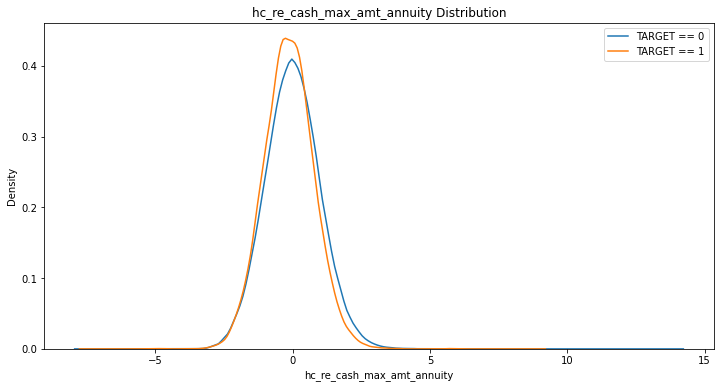

In [19]:
kde_target('hc_re_cash_max_amt_annuity', app_train)

In [20]:
app_train['hc_re_cash_max_amt_annuity'].isnull().sum()

0

### hc_re_cash_min_amt_annuity

In [21]:
app_train[['TARGET', 'hc_re_cash_min_amt_annuity']].corr()

,TARGET,hc_re_cash_min_amt_annuity
TARGET,1.000000,-0.037996
hc_re_cash_min_amt_annuity,-0.037996,1.000000


The correlation between hc_re_cash_min_amt_annuity and the TARGET is -0.0380
Median value for loan that was not repaid = -0.1171
Median value for loan that was repaid =     0.0159


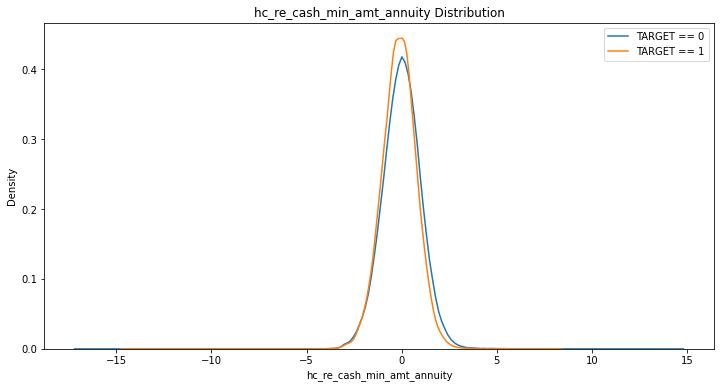

In [22]:
kde_target('hc_re_cash_min_amt_annuity', app_train)

In [23]:
app_train['hc_re_cash_min_amt_annuity'].isnull().sum()

0

### hc_re_cash_sum_amt_annuity

In [24]:
app_train[['TARGET', 'hc_re_cash_sum_amt_annuity']].corr()

,TARGET,hc_re_cash_sum_amt_annuity
TARGET,1.000000,-0.035999
hc_re_cash_sum_amt_annuity,-0.035999,1.000000


The correlation between hc_re_cash_sum_amt_annuity and the TARGET is -0.0360
Median value for loan that was not repaid = -0.1245
Median value for loan that was repaid =     -0.0049


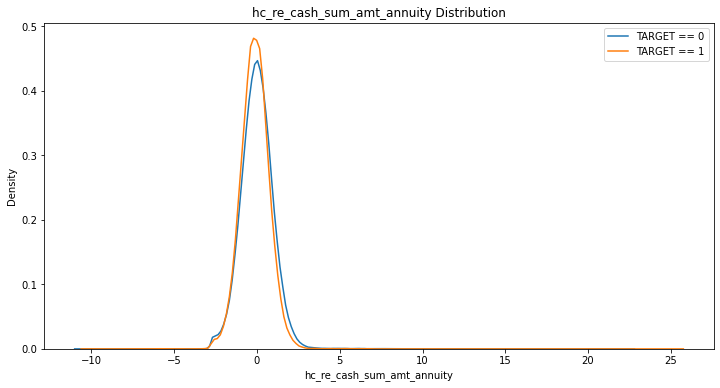

In [25]:
kde_target('hc_re_cash_sum_amt_annuity', app_train)

In [26]:
app_train['hc_re_cash_sum_amt_annuity'].isnull().sum()

0

### hc_re_cash_avg_amt_annuity

In [27]:
app_train[['TARGET', 'hc_re_cash_avg_amt_annuity']].corr()

,TARGET,hc_re_cash_avg_amt_annuity
TARGET,1.000000,-0.038991
hc_re_cash_avg_amt_annuity,-0.038991,1.000000


The correlation between hc_re_cash_avg_amt_annuity and the TARGET is -0.0390
Median value for loan that was not repaid = -0.1323
Median value for loan that was repaid =     0.0027


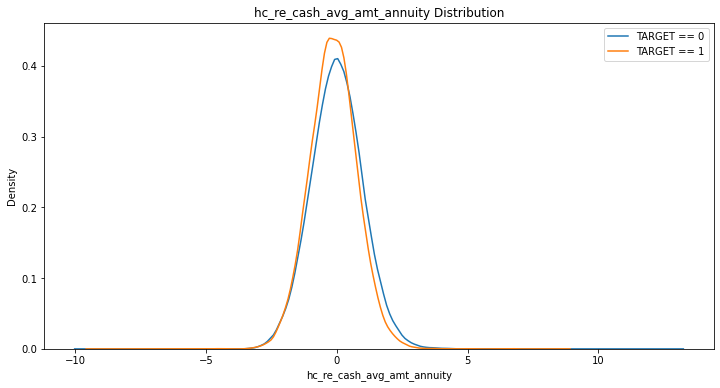

In [28]:
kde_target('hc_re_cash_avg_amt_annuity', app_train)

In [29]:
app_train['hc_re_cash_avg_amt_annuity'].isnull().sum()

0

### hc_re_cash_cnt_amt_annuity

In [30]:
app_train[['TARGET', 'hc_re_cash_cnt_amt_annuity']].corr()

,TARGET,hc_re_cash_cnt_amt_annuity
TARGET,1.000000,-0.023534
hc_re_cash_cnt_amt_annuity,-0.023534,1.000000


The correlation between hc_re_cash_cnt_amt_annuity and the TARGET is -0.0235
Median value for loan that was not repaid = -0.0638
Median value for loan that was repaid =     0.0363


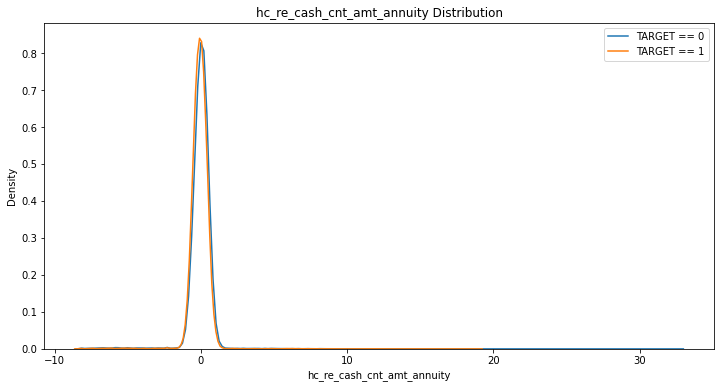

In [31]:
kde_target('hc_re_cash_cnt_amt_annuity', app_train)

In [32]:
app_train['hc_re_cash_cnt_amt_annuity'].isnull().sum()

0

### hc_re_cash_stddev_amt_annuity

In [33]:
app_train[['TARGET', 'hc_re_cash_stddev_amt_annuity']].corr()

,TARGET,hc_re_cash_stddev_amt_annuity
TARGET,1.000000,-0.033695
hc_re_cash_stddev_amt_annuity,-0.033695,1.000000


The correlation between hc_re_cash_stddev_amt_annuity and the TARGET is -0.0337
Median value for loan that was not repaid = -0.1107
Median value for loan that was repaid =     0.0061


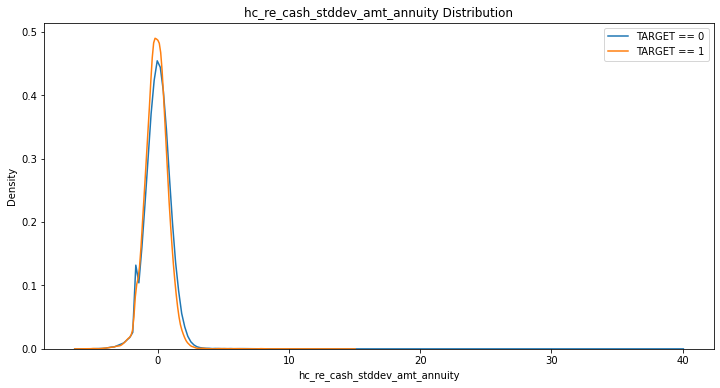

In [34]:
kde_target('hc_re_cash_stddev_amt_annuity', app_train)

In [35]:
app_train['hc_re_cash_stddev_amt_annuity'].isnull().sum()

0

### hc_re_cash_stddev_pop_amt_annuity

In [36]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_amt_annuity']].corr()

,TARGET,hc_re_cash_stddev_pop_amt_annuity
TARGET,1.000000,0.001118
hc_re_cash_stddev_pop_amt_annuity,0.001118,1.000000


The correlation between hc_re_cash_stddev_pop_amt_annuity and the TARGET is 0.0011
Median value for loan that was not repaid = 0.0093
Median value for loan that was repaid =     0.0093


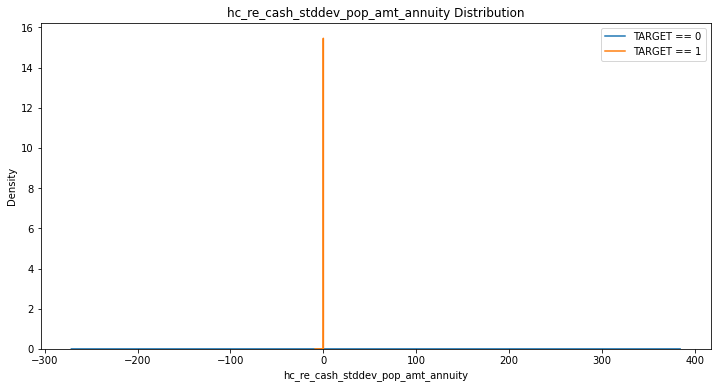

In [37]:
kde_target('hc_re_cash_stddev_pop_amt_annuity', app_train)

In [38]:
app_train['hc_re_cash_stddev_pop_amt_annuity'].isnull().sum()

0

### hc_re_cash_var_pop_amt_annuity

In [39]:
app_train[['TARGET', 'hc_re_cash_var_pop_amt_annuity']].corr()

,TARGET,hc_re_cash_var_pop_amt_annuity
TARGET,1.000000,0.001269
hc_re_cash_var_pop_amt_annuity,0.001269,1.000000


The correlation between hc_re_cash_var_pop_amt_annuity and the TARGET is 0.0013
Median value for loan that was not repaid = 0.0190
Median value for loan that was repaid =     0.0191


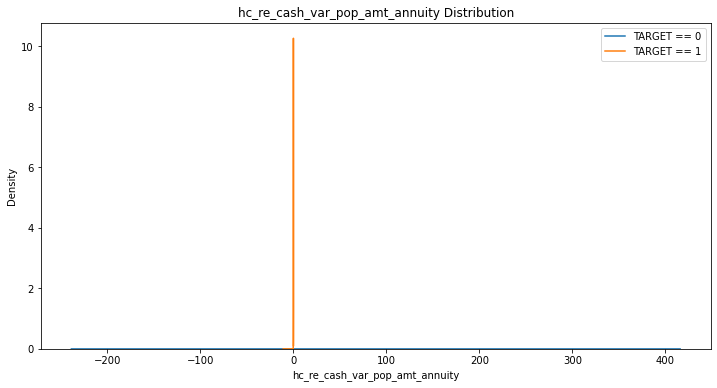

In [40]:
kde_target('hc_re_cash_var_pop_amt_annuity', app_train)

In [41]:
app_train['hc_re_cash_var_pop_amt_annuity'].isnull().sum()

0

### hc_re_cash_var_samp_amt_annuity

In [42]:
app_train[['TARGET', 'hc_re_cash_var_samp_amt_annuity']].corr()

,TARGET,hc_re_cash_var_samp_amt_annuity
TARGET,1.00000,0.00127
hc_re_cash_var_samp_amt_annuity,0.00127,1.00000


The correlation between hc_re_cash_var_samp_amt_annuity and the TARGET is 0.0013
Median value for loan that was not repaid = 0.0191
Median value for loan that was repaid =     0.0191


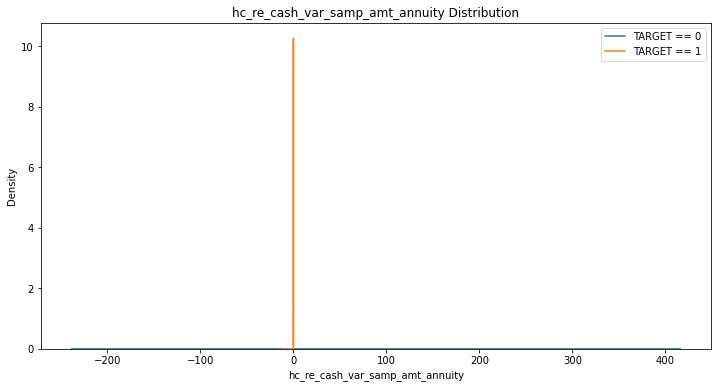

In [43]:
kde_target('hc_re_cash_var_samp_amt_annuity', app_train)

In [44]:
app_train['hc_re_cash_var_samp_amt_annuity'].isnull().sum()

0

### hc_re_cash_variance_samp_amt_annuity

In [45]:
app_train[['TARGET', 'hc_re_cash_variance_samp_amt_annuity']].corr()

,TARGET,hc_re_cash_variance_samp_amt_annuity
TARGET,1.000000,0.002487
hc_re_cash_variance_samp_amt_annuity,0.002487,1.000000


The correlation between hc_re_cash_variance_samp_amt_annuity and the TARGET is 0.0025
Median value for loan that was not repaid = 0.0191
Median value for loan that was repaid =     0.0191


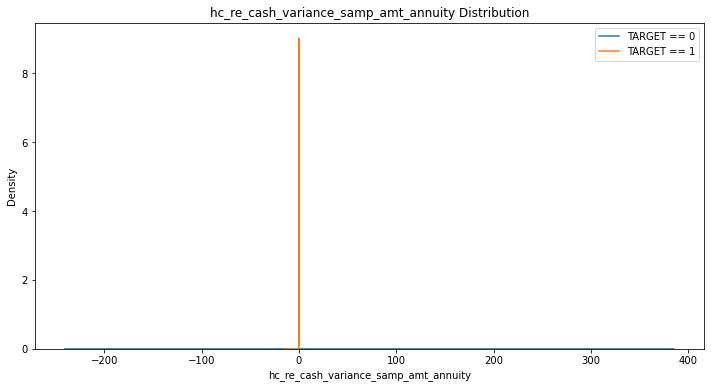

In [46]:
kde_target('hc_re_cash_variance_samp_amt_annuity', app_train)

In [47]:
app_train['hc_re_cash_variance_samp_amt_annuity'].isnull().sum()

0

### hc_re_cash_max_amt_application

In [48]:
app_train[['TARGET', 'hc_re_cash_max_amt_application']].corr()

,TARGET,hc_re_cash_max_amt_application
TARGET,1.000000,-0.002424
hc_re_cash_max_amt_application,-0.002424,1.000000


The correlation between hc_re_cash_max_amt_application and the TARGET is -0.0024
Median value for loan that was not repaid = -0.0186
Median value for loan that was repaid =     -0.0186


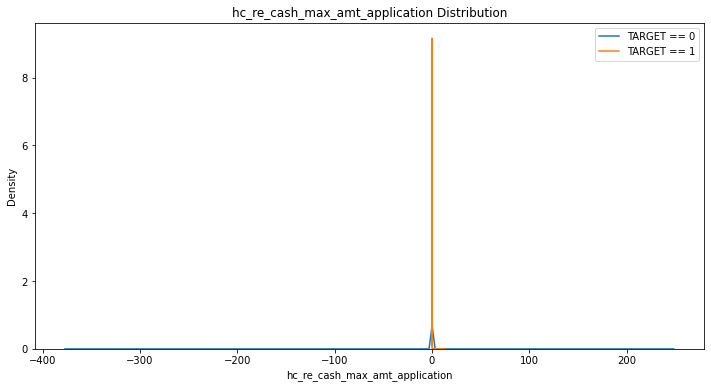

In [49]:
kde_target('hc_re_cash_max_amt_application', app_train)

In [50]:
app_train['hc_re_cash_max_amt_application'].isnull().sum()

0

### hc_re_cash_min_amt_application

In [51]:
app_train[['TARGET', 'hc_re_cash_min_amt_application']].corr()

,TARGET,hc_re_cash_min_amt_application
TARGET,1.000000,-0.002383
hc_re_cash_min_amt_application,-0.002383,1.000000


The correlation between hc_re_cash_min_amt_application and the TARGET is -0.0024
Median value for loan that was not repaid = -0.0182
Median value for loan that was repaid =     -0.0182


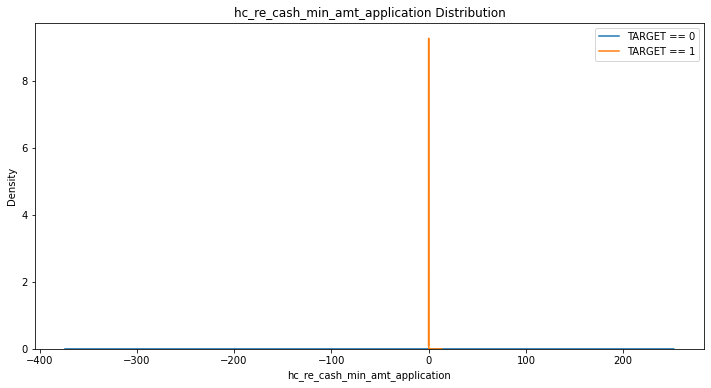

In [52]:
kde_target('hc_re_cash_min_amt_application', app_train)

In [53]:
app_train['hc_re_cash_min_amt_application'].isnull().sum()

0

### hc_re_cash_sum_amt_application

In [54]:
app_train[['TARGET', 'hc_re_cash_sum_amt_application']].corr()

,TARGET,hc_re_cash_sum_amt_application
TARGET,1.000000,-0.002514
hc_re_cash_sum_amt_application,-0.002514,1.000000


The correlation between hc_re_cash_sum_amt_application and the TARGET is -0.0025
Median value for loan that was not repaid = -0.0193
Median value for loan that was repaid =     -0.0193


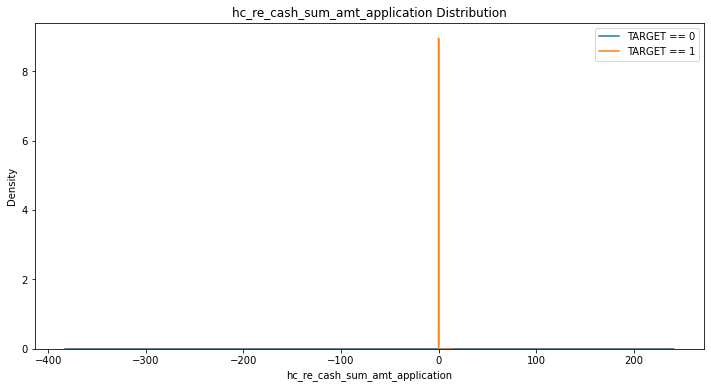

In [55]:
kde_target('hc_re_cash_sum_amt_application', app_train)

In [56]:
app_train['hc_re_cash_sum_amt_application'].isnull().sum()

0

### hc_re_cash_avg_amt_application

In [57]:
app_train[['TARGET', 'hc_re_cash_avg_amt_application']].corr()

,TARGET,hc_re_cash_avg_amt_application
TARGET,1.000000,-0.002418
hc_re_cash_avg_amt_application,-0.002418,1.000000


The correlation between hc_re_cash_avg_amt_application and the TARGET is -0.0024
Median value for loan that was not repaid = -0.0185
Median value for loan that was repaid =     -0.0185


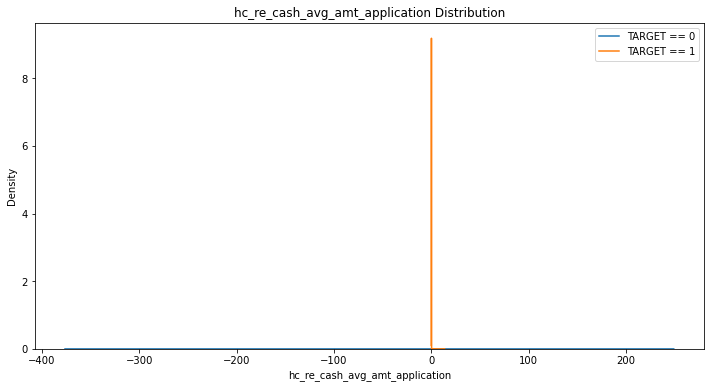

In [58]:
kde_target('hc_re_cash_avg_amt_application', app_train)

In [59]:
app_train['hc_re_cash_avg_amt_application'].isnull().sum()

0

### hc_re_cash_cnt_amt_application

In [60]:
app_train[['TARGET', 'hc_re_cash_cnt_amt_application']].corr()

,TARGET,hc_re_cash_cnt_amt_application
TARGET,1.00000,-0.00267
hc_re_cash_cnt_amt_application,-0.00267,1.00000


The correlation between hc_re_cash_cnt_amt_application and the TARGET is -0.0027
Median value for loan that was not repaid = -0.0207
Median value for loan that was repaid =     -0.0207


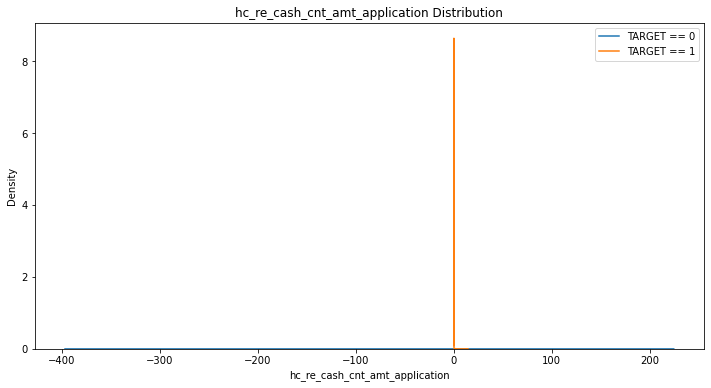

In [61]:
kde_target('hc_re_cash_cnt_amt_application', app_train)

In [62]:
app_train['hc_re_cash_cnt_amt_application'].isnull().sum()

0

### hc_re_cash_stddev_amt_application

In [63]:
app_train[['TARGET', 'hc_re_cash_stddev_amt_application']].corr()

,TARGET,hc_re_cash_stddev_amt_application
TARGET,1.00000,0.00267
hc_re_cash_stddev_amt_application,0.00267,1.00000


The correlation between hc_re_cash_stddev_amt_application and the TARGET is 0.0027
Median value for loan that was not repaid = 0.0207
Median value for loan that was repaid =     0.0207


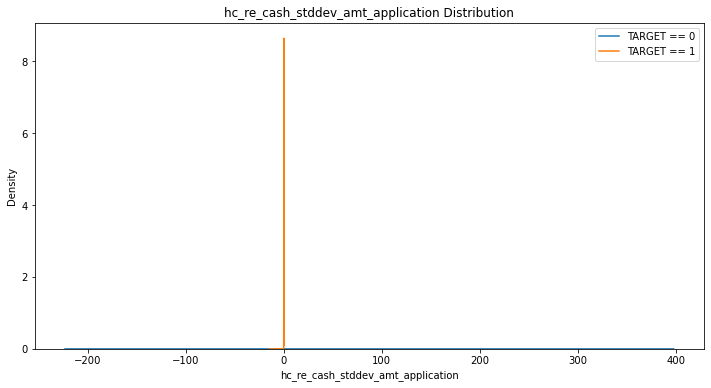

In [64]:
kde_target('hc_re_cash_stddev_amt_application', app_train)

In [65]:
app_train['hc_re_cash_stddev_amt_application'].isnull().sum()

0

### hc_re_cash_stddev_pop_amt_application

In [66]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_amt_application']].corr()

,TARGET,hc_re_cash_stddev_pop_amt_application
TARGET,1.000000,0.002752
hc_re_cash_stddev_pop_amt_application,0.002752,1.000000


The correlation between hc_re_cash_stddev_pop_amt_application and the TARGET is 0.0028
Median value for loan that was not repaid = 0.0214
Median value for loan that was repaid =     0.0214


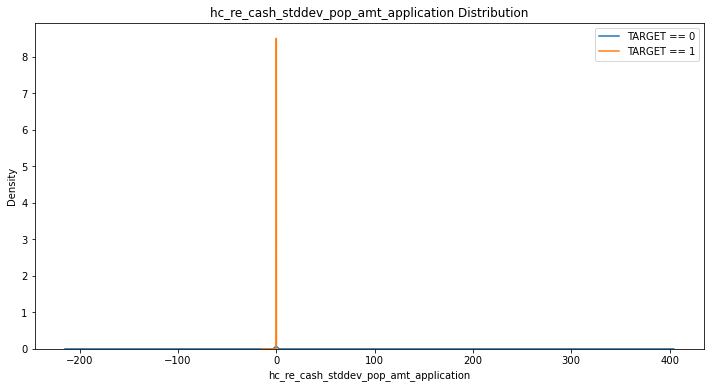

In [67]:
kde_target('hc_re_cash_stddev_pop_amt_application', app_train)

In [68]:
app_train['hc_re_cash_stddev_pop_amt_application'].isnull().sum()

0

### hc_re_cash_var_pop_amt_application

In [69]:
app_train[['TARGET', 'hc_re_cash_var_pop_amt_application']].corr()

,TARGET,hc_re_cash_var_pop_amt_application
TARGET,1.000000,0.002792
hc_re_cash_var_pop_amt_application,0.002792,1.000000


The correlation between hc_re_cash_var_pop_amt_application and the TARGET is 0.0028
Median value for loan that was not repaid = 0.0218
Median value for loan that was repaid =     0.0218


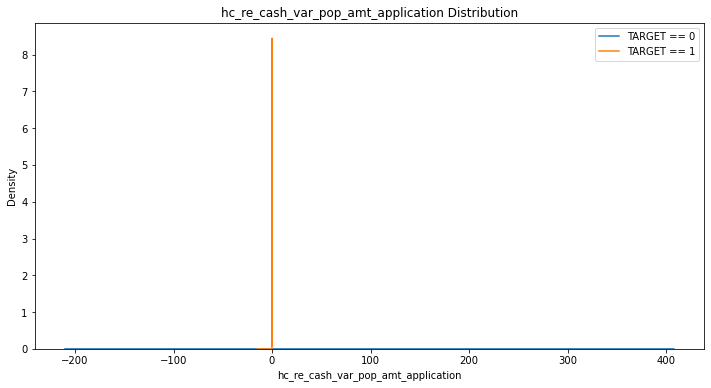

In [70]:
kde_target('hc_re_cash_var_pop_amt_application', app_train)

In [71]:
app_train['hc_re_cash_var_pop_amt_application'].isnull().sum()

0

### hc_re_cash_var_samp_amt_application

In [72]:
app_train[['TARGET', 'hc_re_cash_var_samp_amt_application']].corr()

,TARGET,hc_re_cash_var_samp_amt_application
TARGET,1.000000,0.002792
hc_re_cash_var_samp_amt_application,0.002792,1.000000


The correlation between hc_re_cash_var_samp_amt_application and the TARGET is 0.0028
Median value for loan that was not repaid = 0.0218
Median value for loan that was repaid =     0.0218


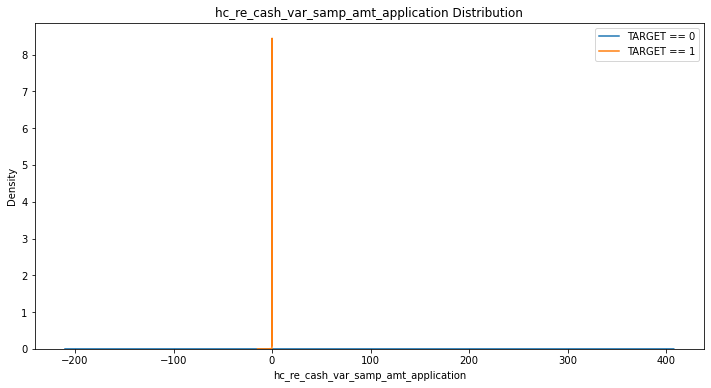

In [73]:
kde_target('hc_re_cash_var_samp_amt_application', app_train)

In [74]:
app_train['hc_re_cash_var_samp_amt_application'].isnull().sum()

0

### hc_re_cash_variance_samp_amt_application

In [75]:
app_train[['TARGET', 'hc_re_cash_variance_samp_amt_application']].corr()

,TARGET,hc_re_cash_variance_samp_amt_application
TARGET,1.000000,-0.002813
hc_re_cash_variance_samp_amt_application,-0.002813,1.000000


The correlation between hc_re_cash_variance_samp_amt_application and the TARGET is -0.0028
Median value for loan that was not repaid = -0.0219
Median value for loan that was repaid =     -0.0219


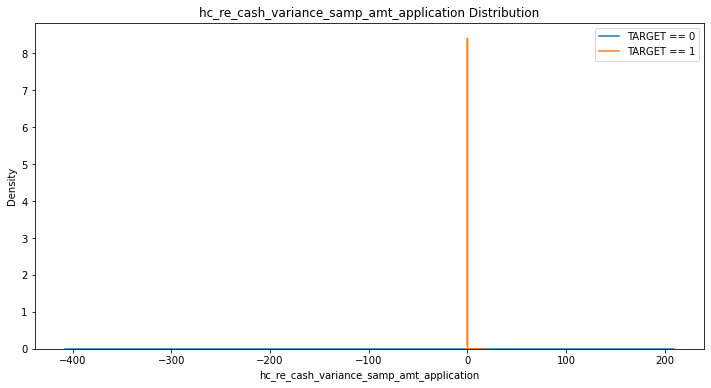

In [76]:
kde_target('hc_re_cash_variance_samp_amt_application', app_train)

In [77]:
app_train['hc_re_cash_variance_samp_amt_application'].isnull().sum()

0

### hc_re_cash_max_amt_credit

In [78]:
app_train[['TARGET', 'hc_re_cash_max_amt_credit']].corr()

,TARGET,hc_re_cash_max_amt_credit
TARGET,1.000000,-0.002764
hc_re_cash_max_amt_credit,-0.002764,1.000000


The correlation between hc_re_cash_max_amt_credit and the TARGET is -0.0028
Median value for loan that was not repaid = -0.0215
Median value for loan that was repaid =     -0.0215


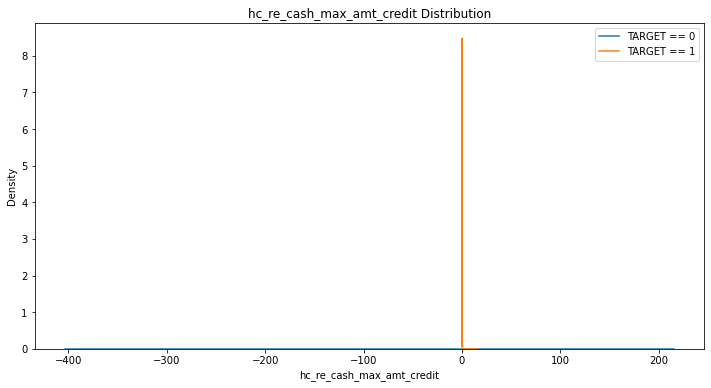

In [79]:
kde_target('hc_re_cash_max_amt_credit', app_train)

In [80]:
app_train['hc_re_cash_max_amt_credit'].isnull().sum()

0

### hc_re_cash_min_amt_credit

In [81]:
app_train[['TARGET', 'hc_re_cash_min_amt_credit']].corr()

,TARGET,hc_re_cash_min_amt_credit
TARGET,1.000000,0.002762
hc_re_cash_min_amt_credit,0.002762,1.000000


The correlation between hc_re_cash_min_amt_credit and the TARGET is 0.0028
Median value for loan that was not repaid = 0.0215
Median value for loan that was repaid =     0.0215


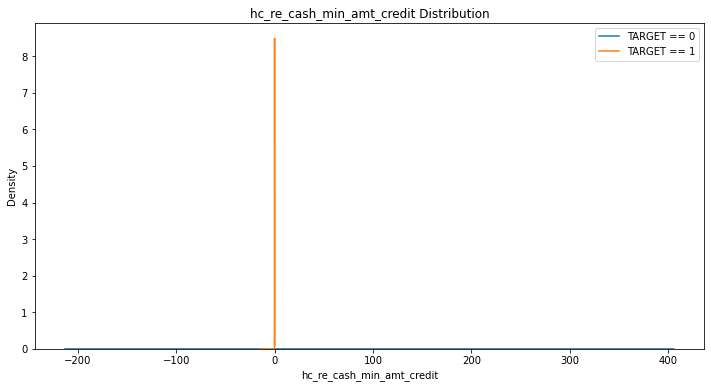

In [82]:
kde_target('hc_re_cash_min_amt_credit', app_train)

In [83]:
app_train['hc_re_cash_min_amt_credit'].isnull().sum()

0

### hc_re_cash_sum_amt_credit

In [84]:
app_train[['TARGET', 'hc_re_cash_sum_amt_credit']].corr()

,TARGET,hc_re_cash_sum_amt_credit
TARGET,1.00000,-0.00281
hc_re_cash_sum_amt_credit,-0.00281,1.00000


The correlation between hc_re_cash_sum_amt_credit and the TARGET is -0.0028
Median value for loan that was not repaid = -0.0219
Median value for loan that was repaid =     -0.0219


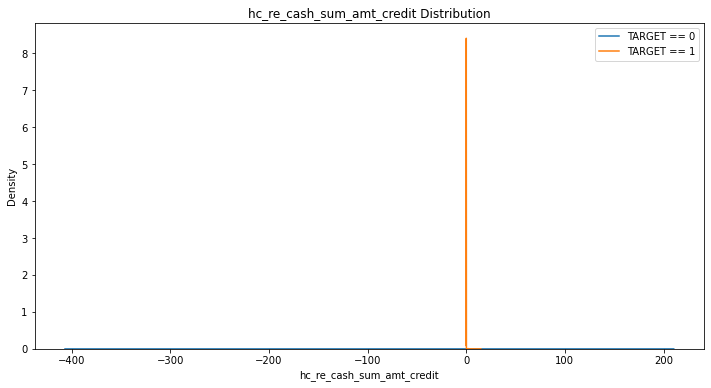

In [85]:
kde_target('hc_re_cash_sum_amt_credit', app_train)

In [86]:
app_train['hc_re_cash_sum_amt_credit'].isnull().sum()

0

### hc_re_cash_avg_amt_credit

In [87]:
app_train[['TARGET', 'hc_re_cash_avg_amt_credit']].corr()

,TARGET,hc_re_cash_avg_amt_credit
TARGET,1.000000,-0.002784
hc_re_cash_avg_amt_credit,-0.002784,1.000000


The correlation between hc_re_cash_avg_amt_credit and the TARGET is -0.0028
Median value for loan that was not repaid = -0.0217
Median value for loan that was repaid =     -0.0217


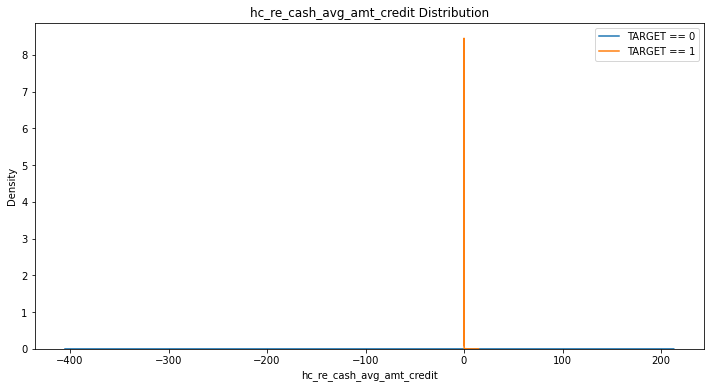

In [88]:
kde_target('hc_re_cash_avg_amt_credit', app_train)

In [89]:
app_train['hc_re_cash_avg_amt_credit'].isnull().sum()

0

### hc_re_cash_cnt_amt_credit

In [90]:
app_train[['TARGET', 'hc_re_cash_cnt_amt_credit']].corr()

,TARGET,hc_re_cash_cnt_amt_credit
TARGET,1.000000,0.002841
hc_re_cash_cnt_amt_credit,0.002841,1.000000


The correlation between hc_re_cash_cnt_amt_credit and the TARGET is 0.0028
Median value for loan that was not repaid = 0.0222
Median value for loan that was repaid =     0.0222


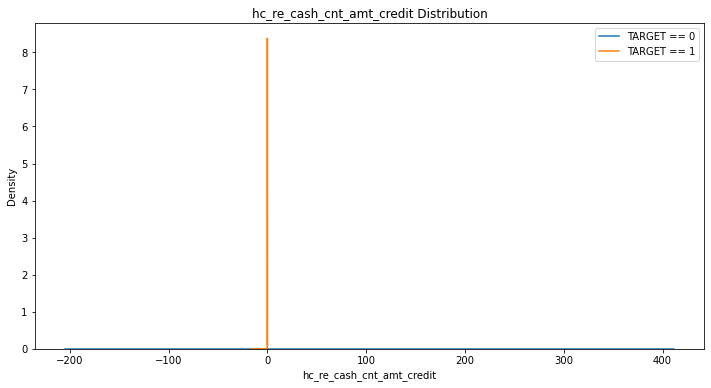

In [91]:
kde_target('hc_re_cash_cnt_amt_credit', app_train)

In [92]:
app_train['hc_re_cash_cnt_amt_credit'].isnull().sum()

0

### hc_re_cash_stddev_amt_credit

In [93]:
app_train[['TARGET', 'hc_re_cash_stddev_amt_credit']].corr()

,TARGET,hc_re_cash_stddev_amt_credit
TARGET,1.000000,-0.002841
hc_re_cash_stddev_amt_credit,-0.002841,1.000000


The correlation between hc_re_cash_stddev_amt_credit and the TARGET is -0.0028
Median value for loan that was not repaid = -0.0222
Median value for loan that was repaid =     -0.0222


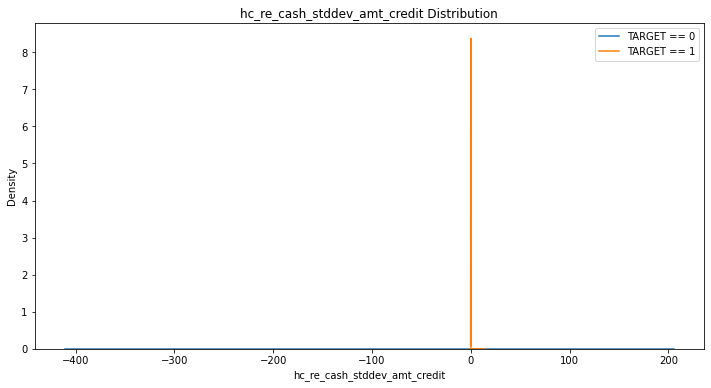

In [94]:
kde_target('hc_re_cash_stddev_amt_credit', app_train)

In [95]:
app_train['hc_re_cash_stddev_amt_credit'].isnull().sum()

0

### hc_re_cash_stddev_pop_amt_credit

In [96]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_amt_credit']].corr()

,TARGET,hc_re_cash_stddev_pop_amt_credit
TARGET,1.000000,0.002863
hc_re_cash_stddev_pop_amt_credit,0.002863,1.000000


The correlation between hc_re_cash_stddev_pop_amt_credit and the TARGET is 0.0029
Median value for loan that was not repaid = 0.0224
Median value for loan that was repaid =     0.0224


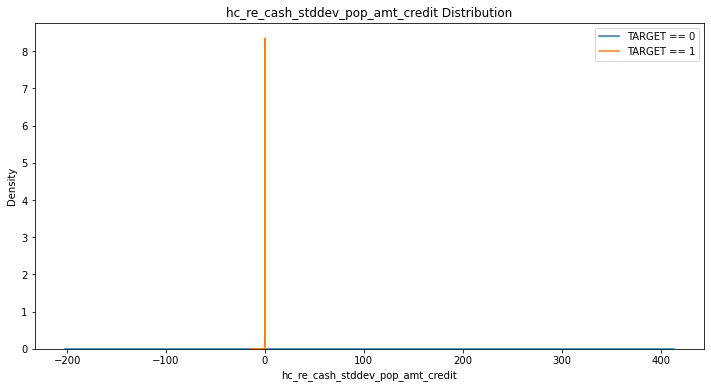

In [97]:
kde_target('hc_re_cash_stddev_pop_amt_credit', app_train)

In [98]:
app_train['hc_re_cash_stddev_pop_amt_credit'].isnull().sum()

0

### hc_re_cash_var_pop_amt_credit

In [99]:
app_train[['TARGET', 'hc_re_cash_var_pop_amt_credit']].corr()

,TARGET,hc_re_cash_var_pop_amt_credit
TARGET,1.000000,0.002878
hc_re_cash_var_pop_amt_credit,0.002878,1.000000


The correlation between hc_re_cash_var_pop_amt_credit and the TARGET is 0.0029
Median value for loan that was not repaid = 0.0226
Median value for loan that was repaid =     0.0226


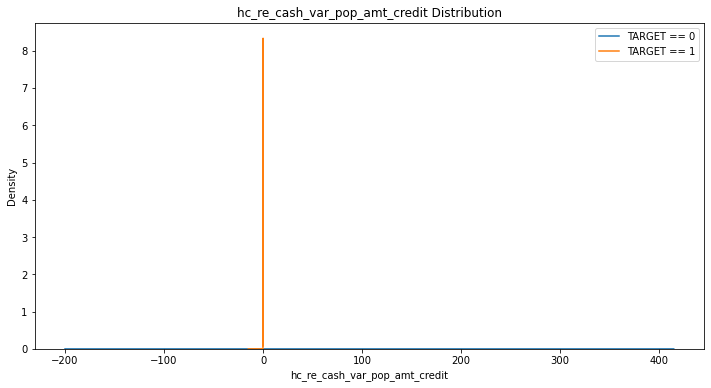

In [100]:
kde_target('hc_re_cash_var_pop_amt_credit', app_train)

In [101]:
app_train['hc_re_cash_var_pop_amt_credit'].isnull().sum()

0

### hc_re_cash_var_samp_amt_credit

In [102]:
app_train[['TARGET', 'hc_re_cash_var_samp_amt_credit']].corr()

,TARGET,hc_re_cash_var_samp_amt_credit
TARGET,1.000000,0.002878
hc_re_cash_var_samp_amt_credit,0.002878,1.000000


The correlation between hc_re_cash_var_samp_amt_credit and the TARGET is 0.0029
Median value for loan that was not repaid = 0.0226
Median value for loan that was repaid =     0.0226


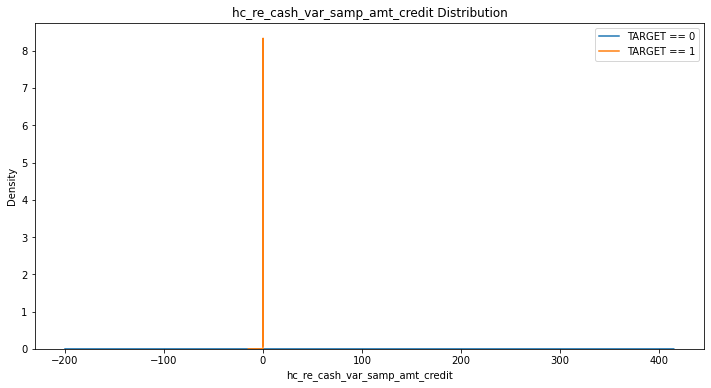

In [103]:
kde_target('hc_re_cash_var_samp_amt_credit', app_train)

In [104]:
app_train['hc_re_cash_var_samp_amt_credit'].isnull().sum()

0

### hc_re_cash_variance_samp_amt_credit

In [105]:
app_train[['TARGET', 'hc_re_cash_variance_samp_amt_credit']].corr()

,TARGET,hc_re_cash_variance_samp_amt_credit
TARGET,1.000000,0.000534
hc_re_cash_variance_samp_amt_credit,0.000534,1.000000


The correlation between hc_re_cash_variance_samp_amt_credit and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


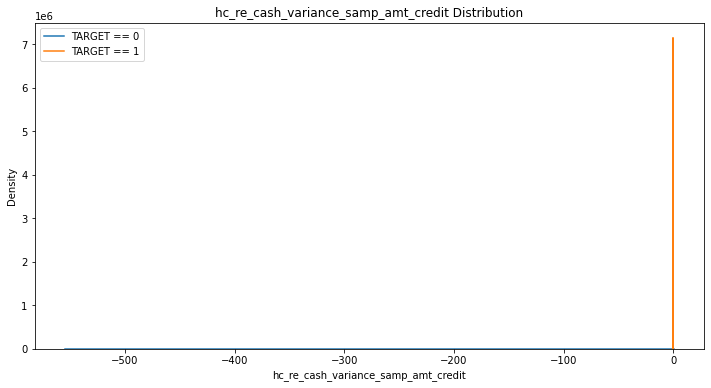

In [106]:
kde_target('hc_re_cash_variance_samp_amt_credit', app_train)

In [107]:
app_train['hc_re_cash_variance_samp_amt_credit'].isnull().sum()

0

### hc_re_cash_max_amt_down_payment

In [108]:
#app_train[['TARGET', 'hc_re_cash_max_amt_down_payment']].corr()

In [109]:
#kde_target('hc_re_cash_max_amt_down_payment', app_train)

In [110]:
#app_train['hc_re_cash_max_amt_down_payment'].isnull().sum()

In [111]:
columns = ['hc_re_cash_max_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_min_amt_down_payment

In [112]:
app_train[['TARGET', 'hc_re_cash_min_amt_down_payment']].corr()

,TARGET,hc_re_cash_min_amt_down_payment
TARGET,1.0,NaN
hc_re_cash_min_amt_down_payment,NaN,NaN


In [113]:
#kde_target('hc_re_cash_min_amt_down_payment', app_train)

In [114]:
app_train['hc_re_cash_min_amt_down_payment'].isnull().sum()

0

In [115]:
columns = ['hc_re_cash_min_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_sum_amt_down_payment

In [116]:
app_train[['TARGET', 'hc_re_cash_sum_amt_down_payment']].corr()

,TARGET,hc_re_cash_sum_amt_down_payment
TARGET,1.0,NaN
hc_re_cash_sum_amt_down_payment,NaN,NaN


In [117]:
#kde_target('hc_re_cash_sum_amt_down_payment', app_train)

In [118]:
app_train['hc_re_cash_sum_amt_down_payment'].isnull().sum()

0

In [119]:
columns = ['hc_re_cash_sum_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_avg_amt_down_payment

In [120]:
app_train[['TARGET', 'hc_re_cash_avg_amt_down_payment']].corr()

,TARGET,hc_re_cash_avg_amt_down_payment
TARGET,1.0,NaN
hc_re_cash_avg_amt_down_payment,NaN,NaN


In [121]:
#kde_target('hc_re_cash_avg_amt_down_payment', app_train)

In [122]:
app_train['hc_re_cash_avg_amt_down_payment'].isnull().sum()

0

In [123]:
columns = ['hc_re_cash_avg_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_cnt_amt_down_payment

In [124]:
app_train[['TARGET', 'hc_re_cash_cnt_amt_down_payment']].corr()

,TARGET,hc_re_cash_cnt_amt_down_payment
TARGET,1.000000,0.002878
hc_re_cash_cnt_amt_down_payment,0.002878,1.000000


In [125]:
#kde_target('hc_re_cash_cnt_amt_down_payment', app_train)

In [126]:
app_train['hc_re_cash_cnt_amt_down_payment'].isnull().sum()

0

In [127]:
columns = ['hc_re_cash_cnt_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_stddev_amt_down_payment

In [128]:
app_train[['TARGET', 'hc_re_cash_stddev_amt_down_payment']].corr()

,TARGET,hc_re_cash_stddev_amt_down_payment
TARGET,1.0,NaN
hc_re_cash_stddev_amt_down_payment,NaN,NaN


In [129]:
#kde_target('hc_re_cash_stddev_amt_down_payment', app_train)

In [130]:
app_train['hc_re_cash_stddev_amt_down_payment'].isnull().sum()

0

In [131]:
columns = ['hc_re_cash_stddev_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_stddev_pop_amt_down_payment

In [132]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_amt_down_payment']].corr()

,TARGET,hc_re_cash_stddev_pop_amt_down_payment
TARGET,1.0,NaN
hc_re_cash_stddev_pop_amt_down_payment,NaN,NaN


In [133]:
#kde_target('hc_re_cash_stddev_pop_amt_down_payment', app_train)

In [134]:
app_train['hc_re_cash_stddev_pop_amt_down_payment'].isnull().sum()

0

In [135]:
columns = ['hc_re_cash_stddev_pop_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_var_pop_amt_down_payment

In [136]:
app_train[['TARGET', 'hc_re_cash_var_pop_amt_down_payment']].corr()

,TARGET,hc_re_cash_var_pop_amt_down_payment
TARGET,1.0,NaN
hc_re_cash_var_pop_amt_down_payment,NaN,NaN


In [137]:
#kde_target('hc_re_cash_var_pop_amt_down_payment', app_train)

In [138]:
app_train['hc_re_cash_var_pop_amt_down_payment'].isnull().sum()

0

In [139]:
columns = ['hc_re_cash_var_pop_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_var_samp_amt_down_payment

In [140]:
app_train[['TARGET', 'hc_re_cash_var_samp_amt_down_payment']].corr()

,TARGET,hc_re_cash_var_samp_amt_down_payment
TARGET,1.0,NaN
hc_re_cash_var_samp_amt_down_payment,NaN,NaN


In [141]:
#kde_target('hc_re_cash_var_samp_amt_down_payment', app_train)

In [142]:
app_train['hc_re_cash_var_samp_amt_down_payment'].isnull().sum()

0

In [143]:
columns = ['hc_re_cash_var_samp_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_variance_samp_amt_down_payment

### 

In [144]:
app_train[['TARGET', 'hc_re_cash_variance_samp_amt_down_payment']].corr()

,TARGET,hc_re_cash_variance_samp_amt_down_payment
TARGET,1.0,NaN
hc_re_cash_variance_samp_amt_down_payment,NaN,NaN


In [145]:
#kde_target('hc_re_cash_variance_samp_amt_down_payment', app_train)

In [146]:
app_train['hc_re_cash_variance_samp_amt_down_payment'].isnull().sum()

0

In [147]:
columns = ['hc_re_cash_variance_samp_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_max_amt_goods_price

In [148]:
app_train[['TARGET', 'hc_re_cash_max_amt_goods_price']].corr()

,TARGET,hc_re_cash_max_amt_goods_price
TARGET,1.000000,-0.000534
hc_re_cash_max_amt_goods_price,-0.000534,1.000000


The correlation between hc_re_cash_max_amt_goods_price and the TARGET is -0.0005
Median value for loan that was not repaid = -0.0018
Median value for loan that was repaid =     -0.0018


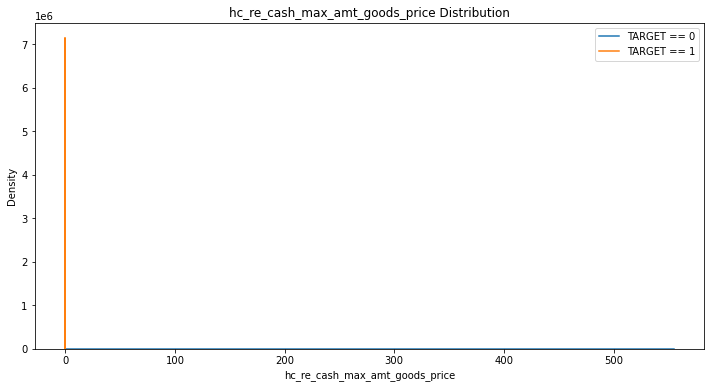

In [149]:
kde_target('hc_re_cash_max_amt_goods_price', app_train)

In [150]:
app_train['hc_re_cash_max_amt_goods_price'].isnull().sum()

0

### hc_re_cash_min_amt_goods_price

In [151]:
app_train[['TARGET', 'hc_re_cash_min_amt_goods_price']].corr()

,TARGET,hc_re_cash_min_amt_goods_price
TARGET,1.000000,-0.000534
hc_re_cash_min_amt_goods_price,-0.000534,1.000000


The correlation between hc_re_cash_min_amt_goods_price and the TARGET is -0.0005
Median value for loan that was not repaid = -0.0018
Median value for loan that was repaid =     -0.0018


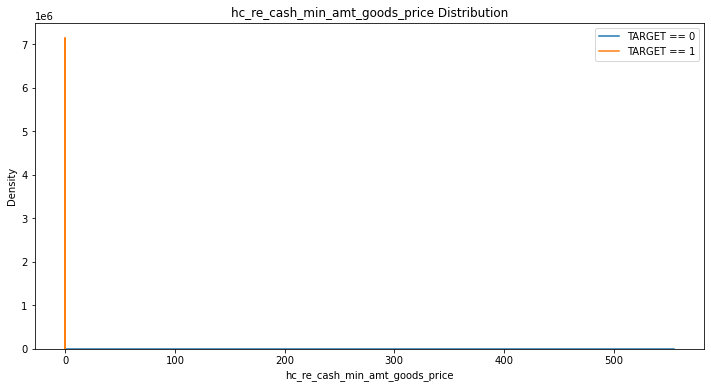

In [152]:
kde_target('hc_re_cash_min_amt_goods_price', app_train)

In [153]:
app_train['hc_re_cash_min_amt_goods_price'].isnull().sum()

0

### hc_re_cash_sum_amt_goods_price

In [154]:
app_train[['TARGET', 'hc_re_cash_sum_amt_goods_price']].corr()

,TARGET,hc_re_cash_sum_amt_goods_price
TARGET,1.000000,-0.000534
hc_re_cash_sum_amt_goods_price,-0.000534,1.000000


The correlation between hc_re_cash_sum_amt_goods_price and the TARGET is -0.0005
Median value for loan that was not repaid = -0.0018
Median value for loan that was repaid =     -0.0018


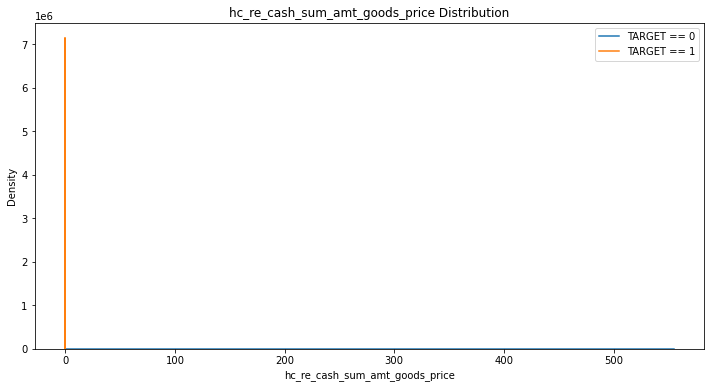

In [155]:
kde_target('hc_re_cash_sum_amt_goods_price', app_train)

In [156]:
app_train['hc_re_cash_sum_amt_goods_price'].isnull().sum()

0

### hc_re_cash_avg_amt_goods_price

In [157]:
app_train[['TARGET', 'hc_re_cash_avg_amt_goods_price']].corr()

,TARGET,hc_re_cash_avg_amt_goods_price
TARGET,1.000000,0.000534
hc_re_cash_avg_amt_goods_price,0.000534,1.000000


The correlation between hc_re_cash_avg_amt_goods_price and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


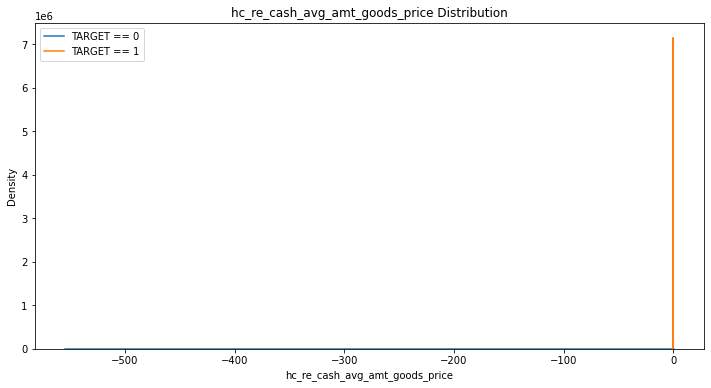

In [158]:
kde_target('hc_re_cash_avg_amt_goods_price', app_train)

In [159]:
app_train['hc_re_cash_avg_amt_goods_price'].isnull().sum()

0

### hc_re_cash_sum_amt_goods_price

In [160]:
app_train[['TARGET', 'hc_re_cash_sum_amt_goods_price']].corr()

,TARGET,hc_re_cash_sum_amt_goods_price
TARGET,1.000000,-0.000534
hc_re_cash_sum_amt_goods_price,-0.000534,1.000000


The correlation between hc_re_cash_sum_amt_goods_price and the TARGET is -0.0005
Median value for loan that was not repaid = -0.0018
Median value for loan that was repaid =     -0.0018


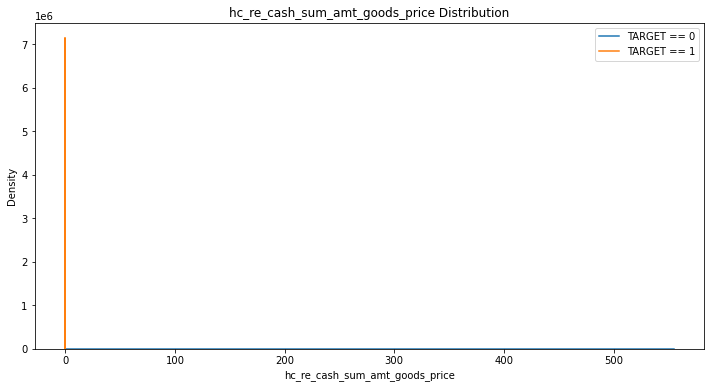

In [161]:
kde_target('hc_re_cash_sum_amt_goods_price', app_train)

In [162]:
app_train['hc_re_cash_sum_amt_goods_price'].isnull().sum()

0

### hc_re_cash_cnt_amt_goods_price

In [163]:
app_train[['TARGET', 'hc_re_cash_cnt_amt_goods_price']].corr()

,TARGET,hc_re_cash_cnt_amt_goods_price
TARGET,1.000000,-0.000534
hc_re_cash_cnt_amt_goods_price,-0.000534,1.000000


The correlation between hc_re_cash_cnt_amt_goods_price and the TARGET is -0.0005
Median value for loan that was not repaid = -0.0018
Median value for loan that was repaid =     -0.0018


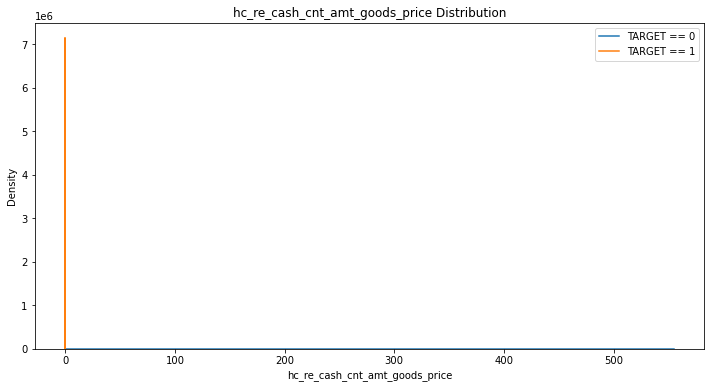

In [164]:
kde_target('hc_re_cash_cnt_amt_goods_price', app_train)

In [165]:
app_train['hc_re_cash_cnt_amt_goods_price'].isnull().sum()

0

### hc_re_cash_stddev_amt_goods_price

In [166]:
app_train[['TARGET', 'hc_re_cash_stddev_amt_goods_price']].corr()

,TARGET,hc_re_cash_stddev_amt_goods_price
TARGET,1.000000,0.000534
hc_re_cash_stddev_amt_goods_price,0.000534,1.000000


The correlation between hc_re_cash_stddev_amt_goods_price and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


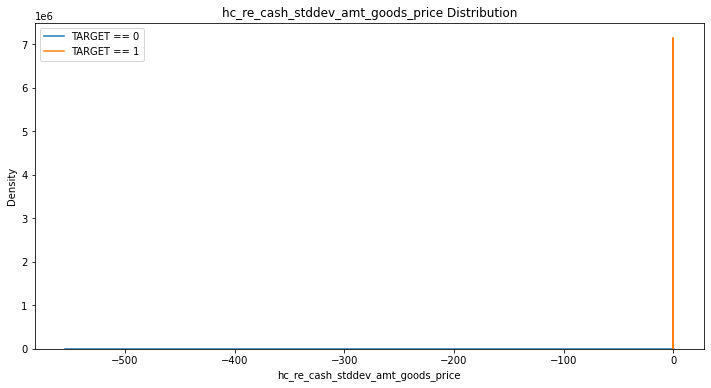

In [167]:
kde_target('hc_re_cash_stddev_amt_goods_price', app_train)

In [168]:
app_train['hc_re_cash_stddev_amt_goods_price'].isnull().sum()

0

### hc_re_cash_stddev_pop_amt_goods_price

In [169]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_amt_goods_price']].corr()

,TARGET,hc_re_cash_stddev_pop_amt_goods_price
TARGET,1.000000,0.000534
hc_re_cash_stddev_pop_amt_goods_price,0.000534,1.000000


The correlation between hc_re_cash_stddev_pop_amt_goods_price and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


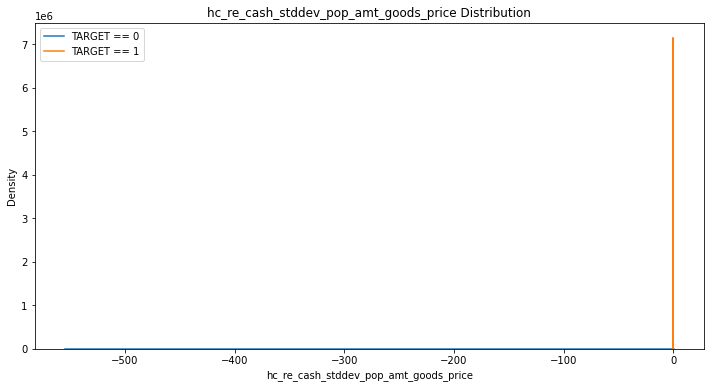

In [170]:
kde_target('hc_re_cash_stddev_pop_amt_goods_price', app_train)

In [171]:
app_train['hc_re_cash_stddev_pop_amt_goods_price'].isnull().sum()

0

### hc_re_cash_var_pop_amt_goods_price

In [172]:
app_train[['TARGET', 'hc_re_cash_var_pop_amt_goods_price']].corr()

,TARGET,hc_re_cash_var_pop_amt_goods_price
TARGET,1.000000,-0.000534
hc_re_cash_var_pop_amt_goods_price,-0.000534,1.000000


The correlation between hc_re_cash_var_pop_amt_goods_price and the TARGET is -0.0005
Median value for loan that was not repaid = -0.0018
Median value for loan that was repaid =     -0.0018


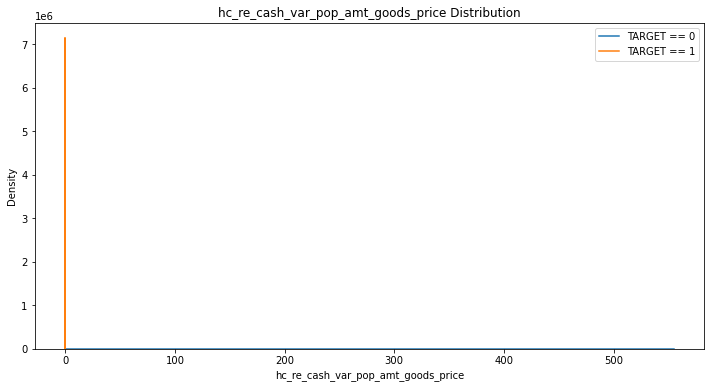

In [173]:
kde_target('hc_re_cash_var_pop_amt_goods_price', app_train)

In [174]:
app_train['hc_re_cash_var_pop_amt_goods_price'].isnull().sum()

0

### hc_re_cash_var_samp_amt_goods_price

In [175]:
app_train[['TARGET', 'hc_re_cash_var_samp_amt_goods_price']].corr()

,TARGET,hc_re_cash_var_samp_amt_goods_price
TARGET,1.000000,0.000534
hc_re_cash_var_samp_amt_goods_price,0.000534,1.000000


The correlation between hc_re_cash_var_samp_amt_goods_price and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


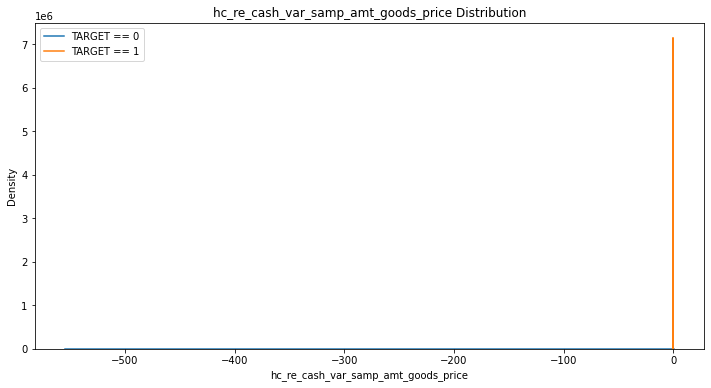

In [176]:
kde_target('hc_re_cash_var_samp_amt_goods_price', app_train)

In [177]:
app_train['hc_re_cash_var_samp_amt_goods_price'].isnull().sum()

0

### hc_re_cash_variance_samp_amt_goods_price

In [178]:
app_train[['TARGET', 'hc_re_cash_variance_samp_amt_goods_price']].corr()

,TARGET,hc_re_cash_variance_samp_amt_goods_price
TARGET,1.000000,0.000534
hc_re_cash_variance_samp_amt_goods_price,0.000534,1.000000


The correlation between hc_re_cash_variance_samp_amt_goods_price and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


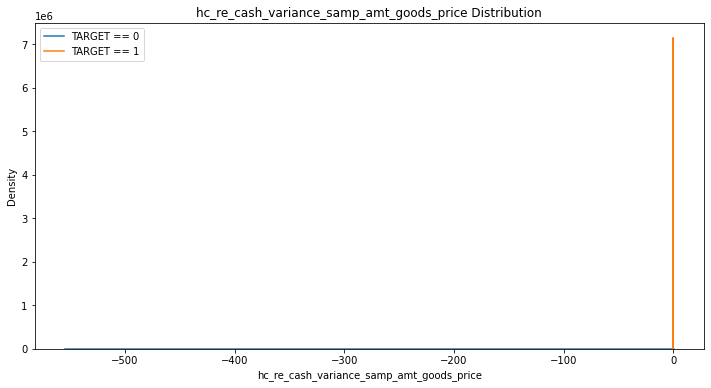

In [179]:
kde_target('hc_re_cash_variance_samp_amt_goods_price', app_train)

In [180]:
app_train['hc_re_cash_variance_samp_amt_goods_price'].isnull().sum()

0

### hc_re_cash_max_rate_down_payment

In [181]:
app_train['hc_re_cash_max_rate_down_payment'].value_counts()

0.0    307511
Name: hc_re_cash_max_rate_down_payment, dtype: int64

In [182]:
app_train[['TARGET', 'hc_re_cash_max_rate_down_payment']].corr()

,TARGET,hc_re_cash_max_rate_down_payment
TARGET,1.0,NaN
hc_re_cash_max_rate_down_payment,NaN,NaN


In [183]:
#kde_target('hc_re_cash_max_rate_down_payment', app_train)

In [184]:
app_train['hc_re_cash_max_rate_down_payment'].isnull().sum()

0

In [185]:
columns = ['hc_re_cash_max_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_min_rate_down_payment

In [186]:
app_train['hc_re_cash_min_rate_down_payment'].value_counts()

0.0    307511
Name: hc_re_cash_min_rate_down_payment, dtype: int64

In [187]:
#kde_target('hc_re_cash_min_rate_down_payment', app_train)

In [188]:
app_train['hc_re_cash_min_rate_down_payment'].isnull().sum()

0

In [189]:
columns = ['hc_re_cash_min_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_sum_rate_down_payment

In [190]:
app_train['hc_re_cash_sum_rate_down_payment'].value_counts()

0.0    307511
Name: hc_re_cash_sum_rate_down_payment, dtype: int64

In [191]:
#kde_target('hc_re_cash_sum_rate_down_payment', app_train)

In [192]:
app_train['hc_re_cash_sum_rate_down_payment'].isnull().sum()

0

In [193]:
columns = ['hc_re_cash_sum_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_avg_rate_down_payment

In [194]:
app_train['hc_re_cash_avg_rate_down_payment'].value_counts()

0.0    307511
Name: hc_re_cash_avg_rate_down_payment, dtype: int64

In [195]:
app_train[['TARGET', 'hc_re_cash_cnt_rate_interest_primary']].corr()

,TARGET,hc_re_cash_cnt_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_cnt_rate_interest_primary,NaN,NaN


In [196]:
#kde_target('hc_re_cash_avg_rate_down_payment', app_train)

In [197]:
app_train['hc_re_cash_avg_rate_down_payment'].isnull().sum()

0

In [198]:
columns = ['hc_re_cash_avg_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_cnt_rate_down_payment

In [199]:
app_train['hc_re_cash_cnt_rate_down_payment'].value_counts()

0.001803    8136
0.001803       3
0.001803       3
0.001803       3
0.001803       3
            ... 
0.001803       1
0.001803       1
0.001803       1
0.001803       1
0.001803       1
Name: hc_re_cash_cnt_rate_down_payment, Length: 297871, dtype: int64

In [200]:
app_train[['TARGET', 'hc_re_cash_cnt_rate_down_payment']].corr()

,TARGET,hc_re_cash_cnt_rate_down_payment
TARGET,1.000000,0.000534
hc_re_cash_cnt_rate_down_payment,0.000534,1.000000


In [201]:
#kde_target('hc_re_cash_cnt_rate_down_payment', app_train)

In [202]:
app_train['hc_re_cash_cnt_rate_down_payment'].isnull().sum()

0

In [203]:
columns = ['hc_re_cash_cnt_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_stddev_rate_down_payment

In [204]:
app_train['hc_re_cash_stddev_rate_down_payment'].value_counts()

0.0    307511
Name: hc_re_cash_stddev_rate_down_payment, dtype: int64

In [205]:
app_train[['TARGET', 'hc_re_cash_stddev_rate_down_payment']].corr()

,TARGET,hc_re_cash_stddev_rate_down_payment
TARGET,1.0,NaN
hc_re_cash_stddev_rate_down_payment,NaN,NaN


In [206]:
#kde_target('hc_re_cash_stddev_rate_down_payment', app_train)

In [207]:
app_train['hc_re_cash_stddev_rate_down_payment'].isnull().sum()

0

In [208]:
columns = ['hc_re_cash_stddev_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_stddev_pop_rate_down_payment

In [209]:
app_train['hc_re_cash_stddev_pop_rate_down_payment'].value_counts()

0.0    307511
Name: hc_re_cash_stddev_pop_rate_down_payment, dtype: int64

In [210]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_rate_down_payment']].corr()

,TARGET,hc_re_cash_stddev_pop_rate_down_payment
TARGET,1.0,NaN
hc_re_cash_stddev_pop_rate_down_payment,NaN,NaN


In [211]:
#kde_target('hc_re_cash_stddev_pop_rate_down_payment', app_train)

In [212]:
app_train['hc_re_cash_stddev_pop_rate_down_payment'].isnull().sum()

0

In [213]:
columns = ['hc_re_cash_stddev_pop_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_var_pop_rate_down_payment

In [214]:
app_train['hc_re_cash_var_pop_rate_down_payment'].value_counts()

0.0    307511
Name: hc_re_cash_var_pop_rate_down_payment, dtype: int64

In [215]:
app_train[['TARGET', 'hc_re_cash_var_pop_rate_down_payment']].corr()

,TARGET,hc_re_cash_var_pop_rate_down_payment
TARGET,1.0,NaN
hc_re_cash_var_pop_rate_down_payment,NaN,NaN


In [216]:
#kde_target('hc_re_cash_var_pop_rate_down_payment', app_train)

In [217]:
app_train['hc_re_cash_var_pop_rate_down_payment'].isnull().sum()

0

In [218]:
columns = ['hc_re_cash_var_pop_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_var_samp_rate_down_payment

In [219]:
app_train['hc_re_cash_var_samp_rate_down_payment'].value_counts()

0.0    307511
Name: hc_re_cash_var_samp_rate_down_payment, dtype: int64

In [220]:
app_train[['TARGET', 'hc_re_cash_var_samp_rate_down_payment']].corr()

,TARGET,hc_re_cash_var_samp_rate_down_payment
TARGET,1.0,NaN
hc_re_cash_var_samp_rate_down_payment,NaN,NaN


In [221]:
#kde_target('hc_re_cash_var_samp_rate_down_payment', app_train)

In [222]:
app_train['hc_re_cash_var_samp_rate_down_payment'].isnull().sum()

0

In [223]:
columns = ['hc_re_cash_var_samp_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_variance_samp_rate_down_payment

In [224]:
app_train['hc_re_cash_variance_samp_rate_down_payment'].value_counts()

0.0    307511
Name: hc_re_cash_variance_samp_rate_down_payment, dtype: int64

In [225]:
app_train[['TARGET', 'hc_re_cash_variance_samp_rate_down_payment']].corr()

,TARGET,hc_re_cash_variance_samp_rate_down_payment
TARGET,1.0,NaN
hc_re_cash_variance_samp_rate_down_payment,NaN,NaN


In [226]:
#kde_target('hc_re_cash_variance_samp_rate_down_payment', app_train)

In [227]:
app_train['hc_re_cash_variance_samp_rate_down_payment'].isnull().sum()

0

In [228]:
columns = ['hc_re_cash_variance_samp_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_max_rate_interest_primary

In [229]:
#app_train['hc_re_cash_max_rate_interest_primary'].value_counts()

In [230]:
app_train[['TARGET', 'hc_re_cash_max_rate_interest_primary']].corr()

,TARGET,hc_re_cash_max_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_max_rate_interest_primary,NaN,NaN


In [231]:
#kde_target('hc_re_cash_max_rate_interest_primary', app_train)

In [232]:
app_train['hc_re_cash_max_rate_interest_primary'].isnull().sum()

0

In [233]:
columns = ['hc_re_cash_max_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_min_rate_interest_primary

In [234]:
#app_train['hc_re_cash_min_rate_interest_primary'].value_counts()

In [235]:
app_train[['TARGET', 'hc_re_cash_min_rate_interest_primary']].corr()

,TARGET,hc_re_cash_min_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_min_rate_interest_primary,NaN,NaN


In [236]:
#kde_target('hc_re_cash_min_rate_interest_primary', app_train)

In [237]:
app_train['hc_re_cash_min_rate_interest_primary'].isnull().sum()

0

In [238]:
columns = ['hc_re_cash_min_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_sum_rate_interest_primary

In [239]:
#app_train['hc_re_cash_sum_rate_interest_primary'].value_counts()

In [240]:
app_train[['TARGET', 'hc_re_cash_sum_rate_interest_primary']].corr()

,TARGET,hc_re_cash_sum_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_sum_rate_interest_primary,NaN,NaN


In [241]:
#kde_target('hc_re_cash_sum_rate_interest_primary', app_train)

In [242]:
app_train['hc_re_cash_sum_rate_interest_primary'].isnull().sum()

0

In [243]:
columns = ['hc_re_cash_sum_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_avg_rate_interest_primary

In [244]:
#app_train['hc_re_cash_avg_rate_interest_primary'].value_counts()

In [245]:
app_train[['TARGET', 'hc_re_cash_avg_rate_interest_primary']].corr()

,TARGET,hc_re_cash_avg_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_avg_rate_interest_primary,NaN,NaN


In [246]:
#kde_target('hc_re_cash_avg_rate_interest_primary', app_train)

In [247]:
app_train['hc_re_cash_avg_rate_interest_primary'].isnull().sum()

0

In [248]:
columns = ['hc_re_cash_avg_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_cnt_rate_interest_primary

In [249]:
#app_train['hc_re_cash_cnt_rate_interest_primary'].value_counts()

In [250]:
app_train[['TARGET', 'hc_re_cash_cnt_rate_interest_primary']].corr()

,TARGET,hc_re_cash_cnt_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_cnt_rate_interest_primary,NaN,NaN


In [251]:
#kde_target('hc_re_cash_cnt_rate_interest_primary', app_train)

In [252]:
app_train['hc_re_cash_cnt_rate_interest_primary'].isnull().sum()

0

In [253]:
columns = ['hc_re_cash_cnt_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_stddev_rate_interest_primary

In [254]:
#app_train['hc_re_cash_stddev_rate_interest_primary'].value_counts()

In [255]:
app_train[['TARGET', 'hc_re_cash_stddev_rate_interest_primary']].corr()

,TARGET,hc_re_cash_stddev_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_stddev_rate_interest_primary,NaN,NaN


In [256]:
#kde_target('hc_re_cash_stddev_rate_interest_primary', app_train)

In [257]:
app_train['hc_re_cash_stddev_rate_interest_primary'].isnull().sum()

0

In [258]:
columns = ['hc_re_cash_stddev_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_stddev_pop_rate_interest_primary

In [259]:
#app_train['hc_re_cash_stddev_pop_rate_interest_primary'].value_counts()

In [260]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_rate_interest_primary']].corr()

,TARGET,hc_re_cash_stddev_pop_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_stddev_pop_rate_interest_primary,NaN,NaN


In [261]:
#kde_target('hc_re_cash_stddev_pop_rate_interest_primary', app_train)

In [262]:
app_train['hc_re_cash_stddev_pop_rate_interest_primary'].isnull().sum()

0

In [263]:
columns = ['hc_re_cash_stddev_pop_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_var_pop_rate_interest_primary

In [264]:
#app_train['hc_re_cash_var_pop_rate_interest_primary'].value_counts()

In [265]:
app_train[['TARGET', 'hc_re_cash_var_pop_rate_interest_primary']].corr()

,TARGET,hc_re_cash_var_pop_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_var_pop_rate_interest_primary,NaN,NaN


In [266]:
#kde_target('hc_re_cash_var_pop_rate_interest_primary', app_train)

In [267]:
app_train['hc_re_cash_var_pop_rate_interest_primary'].isnull().sum()

0

In [268]:
columns = ['hc_re_cash_var_pop_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_var_samp_rate_interest_primary

In [269]:
#app_train['hc_re_cash_var_samp_rate_interest_primary'].value_counts()

In [270]:
app_train[['TARGET', 'hc_re_cash_var_samp_rate_interest_primary']].corr()

,TARGET,hc_re_cash_var_samp_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_var_samp_rate_interest_primary,NaN,NaN


In [271]:
#kde_target('hc_re_cash_var_samp_rate_interest_primary', app_train)

In [272]:
app_train['hc_re_cash_var_samp_rate_interest_primary'].isnull().sum()

0

In [273]:
columns = ['hc_re_cash_var_samp_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_variance_samp_rate_interest_primary

In [274]:
#app_train['hc_re_cash_variance_samp_rate_interest_primary'].value_counts()

In [275]:
app_train[['TARGET', 'hc_re_cash_variance_samp_rate_interest_primary']].corr()

,TARGET,hc_re_cash_variance_samp_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_variance_samp_rate_interest_primary,NaN,NaN


In [276]:
#kde_target('hc_re_cash_variance_samp_rate_interest_primary', app_train)

In [277]:
app_train['hc_re_cash_variance_samp_rate_interest_primary'].isnull().sum()

0

In [278]:
columns = ['hc_re_cash_variance_samp_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_max_rate_interest_privileged

In [279]:
#app_train['hc_re_cash_max_rate_interest_privileged'].value_counts()

In [280]:
app_train[['TARGET', 'hc_re_cash_max_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_max_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_max_rate_interest_privileged,NaN,NaN


In [281]:
#kde_target('hc_re_cash_max_rate_interest_privileged', app_train)

In [282]:
app_train['hc_re_cash_max_rate_interest_privileged'].isnull().sum()

0

In [283]:
columns = ['hc_re_cash_max_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_min_rate_interest_privileged

In [284]:
#app_train['hc_re_cash_min_rate_interest_privileged'].value_counts()

In [285]:
app_train[['TARGET', 'hc_re_cash_min_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_min_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_min_rate_interest_privileged,NaN,NaN


In [286]:
#kde_target('hc_re_cash_min_rate_interest_privileged', app_train)

In [287]:
app_train['hc_re_cash_min_rate_interest_privileged'].isnull().sum()

0

In [288]:
columns = ['hc_re_cash_min_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_sum_rate_interest_privileged

In [289]:
#app_train['hc_re_cash_sum_rate_interest_privileged'].value_counts()

In [290]:
app_train[['TARGET', 'hc_re_cash_sum_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_sum_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_sum_rate_interest_privileged,NaN,NaN


In [291]:
#kde_target('hc_re_cash_sum_rate_interest_privileged', app_train)

In [292]:
app_train['hc_re_cash_sum_rate_interest_privileged'].isnull().sum()

0

In [293]:
columns = ['hc_re_cash_sum_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_avg_rate_interest_privileged

In [294]:
#app_train['hc_re_cash_avg_rate_interest_privileged'].value_counts()

In [295]:
app_train[['TARGET', 'hc_re_cash_avg_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_avg_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_avg_rate_interest_privileged,NaN,NaN


In [296]:
#kde_target('hc_re_cash_avg_rate_interest_privileged', app_train)

In [297]:
app_train['hc_re_cash_avg_rate_interest_privileged'].isnull().sum()

0

In [298]:
columns = ['hc_re_cash_avg_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_cnt_rate_interest_privileged

In [299]:
#app_train['hc_re_cash_cnt_rate_interest_privileged'].value_counts()

In [300]:
app_train[['TARGET', 'hc_re_cash_cnt_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_cnt_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_cnt_rate_interest_privileged,NaN,NaN


In [301]:
#kde_target('hc_re_cash_cnt_rate_interest_privileged', app_train)

In [302]:
app_train['hc_re_cash_cnt_rate_interest_privileged'].isnull().sum()

0

In [303]:
columns = ['hc_re_cash_cnt_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_stddev_rate_interest_privileged

In [304]:
#app_train['hc_re_cash_stddev_rate_interest_privileged'].value_counts()

In [305]:
app_train[['TARGET', 'hc_re_cash_stddev_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_stddev_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_stddev_rate_interest_privileged,NaN,NaN


In [306]:
#kde_target('hc_re_cash_stddev_rate_interest_privileged', app_train)

In [307]:
app_train['hc_re_cash_stddev_rate_interest_privileged'].isnull().sum()

0

In [308]:
columns = ['hc_re_cash_stddev_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_stddev_pop_rate_interest_privileged

In [309]:
#app_train['hc_re_cash_stddev_pop_rate_interest_privileged'].value_counts()

In [310]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_stddev_pop_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_stddev_pop_rate_interest_privileged,NaN,NaN


In [311]:
#kde_target('hc_re_cash_stddev_pop_rate_interest_privileged', app_train)

In [312]:
app_train['hc_re_cash_stddev_pop_rate_interest_privileged'].isnull().sum()

0

In [313]:
columns = ['hc_re_cash_stddev_pop_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_var_pop_rate_interest_privileged

In [314]:
#app_train['hc_re_cash_var_pop_rate_interest_privileged'].value_counts()

In [315]:
app_train[['TARGET', 'hc_re_cash_var_pop_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_var_pop_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_var_pop_rate_interest_privileged,NaN,NaN


In [316]:
#kde_target('hc_re_cash_var_pop_rate_interest_privileged', app_train)

In [317]:
app_train['hc_re_cash_var_pop_rate_interest_privileged'].isnull().sum()

0

In [318]:
columns = ['hc_re_cash_var_pop_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_var_samp_rate_interest_privileged

In [319]:
#app_train['hc_re_cash_var_samp_rate_interest_privileged'].value_counts()

In [320]:
app_train[['TARGET', 'hc_re_cash_var_samp_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_var_samp_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_var_samp_rate_interest_privileged,NaN,NaN


In [321]:
#kde_target('hc_re_cash_var_samp_rate_interest_privileged', app_train)

In [322]:
app_train['hc_re_cash_var_samp_rate_interest_privileged'].isnull().sum()

0

In [323]:
columns = ['hc_re_cash_var_samp_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_variance_samp_rate_interest_privileged

In [324]:
#app_train['hc_re_cash_variance_samp_rate_interest_privileged'].value_counts()

In [325]:
app_train[['TARGET', 'hc_re_cash_variance_samp_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_variance_samp_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_variance_samp_rate_interest_privileged,NaN,NaN


In [326]:
#kde_target('hc_re_cash_variance_samp_rate_interest_privileged', app_train)

In [327]:
app_train['hc_re_cash_variance_samp_rate_interest_privileged'].isnull().sum()

0

In [328]:
columns = ['hc_re_cash_variance_samp_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_max_sk_dpd

In [329]:
app_train[['TARGET', 'hc_re_cash_max_sk_dpd']].corr()

,TARGET,hc_re_cash_max_sk_dpd
TARGET,1.000000,0.000534
hc_re_cash_max_sk_dpd,0.000534,1.000000


The correlation between hc_re_cash_max_sk_dpd and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


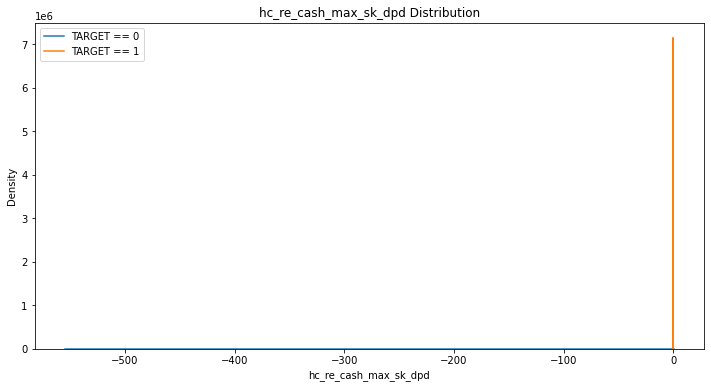

In [330]:
kde_target('hc_re_cash_max_sk_dpd', app_train)

In [331]:
app_train['hc_re_cash_max_sk_dpd'].isnull().sum()

0

### hc_re_cash_min_sk_dpd

In [332]:
app_train[['TARGET', 'hc_re_cash_min_sk_dpd']].corr()

,TARGET,hc_re_cash_min_sk_dpd
TARGET,1.000000,0.000534
hc_re_cash_min_sk_dpd,0.000534,1.000000


The correlation between hc_re_cash_min_sk_dpd and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


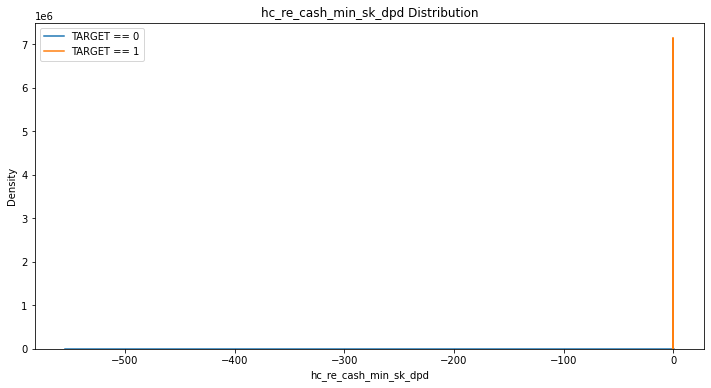

In [333]:
kde_target('hc_re_cash_min_sk_dpd', app_train)

In [334]:
app_train['hc_re_cash_min_sk_dpd'].isnull().sum()

0

### hc_re_cash_sum_sk_dpd

In [335]:
app_train[['TARGET', 'hc_re_cash_sum_sk_dpd']].corr()

,TARGET,hc_re_cash_sum_sk_dpd
TARGET,1.000000,0.000534
hc_re_cash_sum_sk_dpd,0.000534,1.000000


The correlation between hc_re_cash_sum_sk_dpd and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


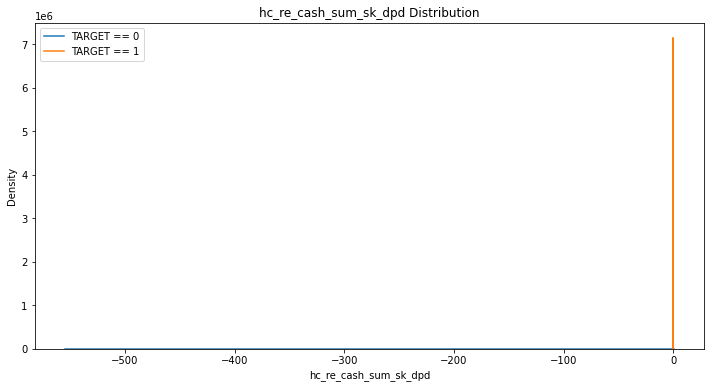

In [336]:
kde_target('hc_re_cash_sum_sk_dpd', app_train)

In [337]:
app_train['hc_re_cash_sum_sk_dpd'].isnull().sum()

0

### hc_re_cash_avg_sk_dpd

In [338]:
app_train[['TARGET', 'hc_re_cash_avg_sk_dpd']].corr()

,TARGET,hc_re_cash_avg_sk_dpd
TARGET,1.000000,0.000534
hc_re_cash_avg_sk_dpd,0.000534,1.000000


The correlation between hc_re_cash_avg_sk_dpd and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


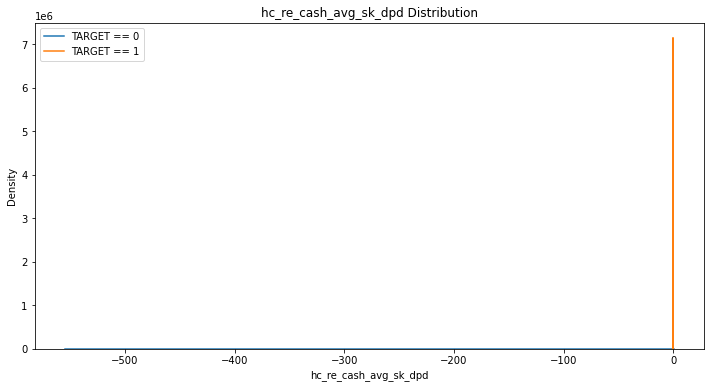

In [339]:
kde_target('hc_re_cash_avg_sk_dpd', app_train)

In [340]:
app_train['hc_re_cash_avg_sk_dpd'].isnull().sum()

0

### hc_re_cash_cnt_sk_dpd

In [341]:
app_train[['TARGET', 'hc_re_cash_cnt_sk_dpd']].corr()

,TARGET,hc_re_cash_cnt_sk_dpd
TARGET,1.000000,0.000534
hc_re_cash_cnt_sk_dpd,0.000534,1.000000


The correlation between hc_re_cash_cnt_sk_dpd and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


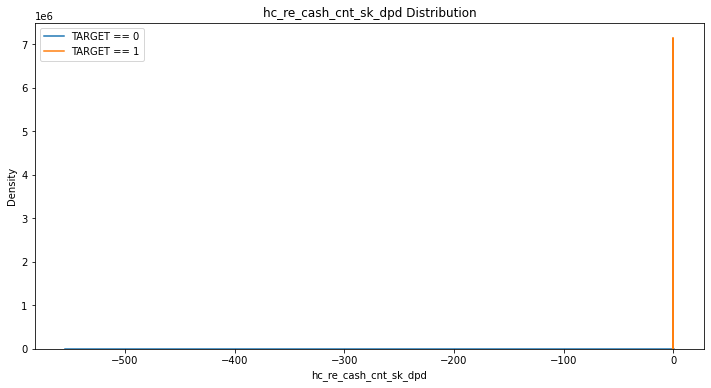

In [342]:
kde_target('hc_re_cash_cnt_sk_dpd', app_train)

In [343]:
app_train['hc_re_cash_cnt_sk_dpd'].isnull().sum()

0

### hc_re_cash_stddev_sk_dpd

In [344]:
app_train[['TARGET', 'hc_re_cash_stddev_sk_dpd']].corr()

,TARGET,hc_re_cash_stddev_sk_dpd
TARGET,1.000000,0.000534
hc_re_cash_stddev_sk_dpd,0.000534,1.000000


The correlation between hc_re_cash_stddev_sk_dpd and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


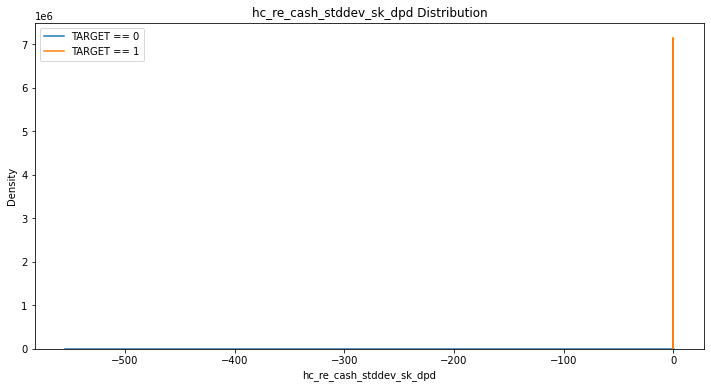

In [345]:
kde_target('hc_re_cash_stddev_sk_dpd', app_train)

In [346]:
app_train['hc_re_cash_stddev_sk_dpd'].isnull().sum()

0

### hc_re_cash_stddev_pop_sk_dpd

In [347]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_sk_dpd']].corr()

,TARGET,hc_re_cash_stddev_pop_sk_dpd
TARGET,1.000000,-0.000534
hc_re_cash_stddev_pop_sk_dpd,-0.000534,1.000000


The correlation between hc_re_cash_stddev_pop_sk_dpd and the TARGET is -0.0005
Median value for loan that was not repaid = -0.0018
Median value for loan that was repaid =     -0.0018


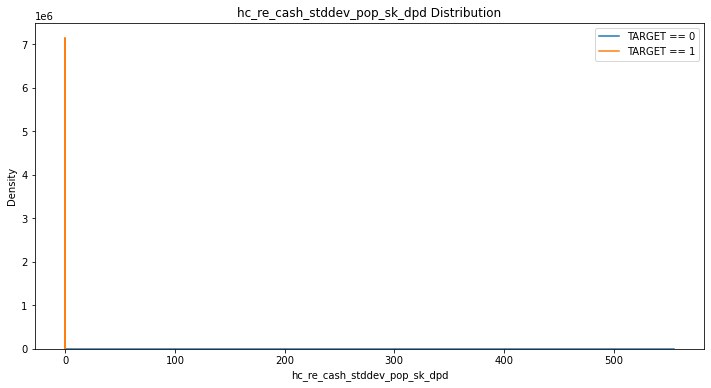

In [348]:
kde_target('hc_re_cash_stddev_pop_sk_dpd', app_train)

In [349]:
app_train['hc_re_cash_stddev_pop_sk_dpd'].isnull().sum()

0

### hc_re_cash_var_pop_sk_dpd

In [350]:
app_train[['TARGET', 'hc_re_cash_var_pop_sk_dpd']].corr()

,TARGET,hc_re_cash_var_pop_sk_dpd
TARGET,1.000000,-0.000534
hc_re_cash_var_pop_sk_dpd,-0.000534,1.000000


The correlation between hc_re_cash_var_pop_sk_dpd and the TARGET is -0.0005
Median value for loan that was not repaid = -0.0018
Median value for loan that was repaid =     -0.0018


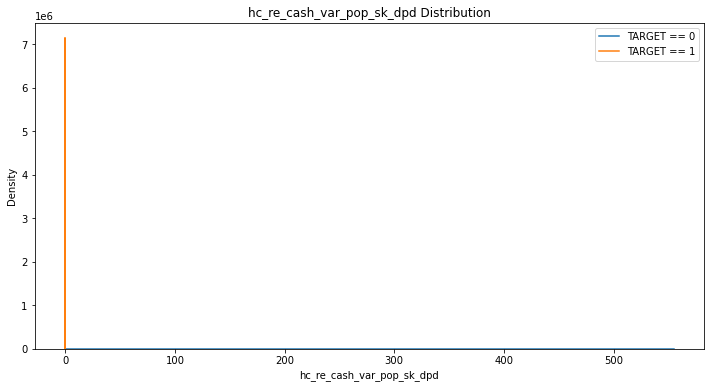

In [351]:
kde_target('hc_re_cash_var_pop_sk_dpd', app_train)

In [352]:
app_train['hc_re_cash_var_pop_sk_dpd'].isnull().sum()

0

### hc_re_cash_var_samp_sk_dpd

In [353]:
app_train[['TARGET', 'hc_re_cash_var_samp_sk_dpd']].corr()

,TARGET,hc_re_cash_var_samp_sk_dpd
TARGET,1.000000,-0.000534
hc_re_cash_var_samp_sk_dpd,-0.000534,1.000000


The correlation between hc_re_cash_var_samp_sk_dpd and the TARGET is -0.0005
Median value for loan that was not repaid = -0.0018
Median value for loan that was repaid =     -0.0018


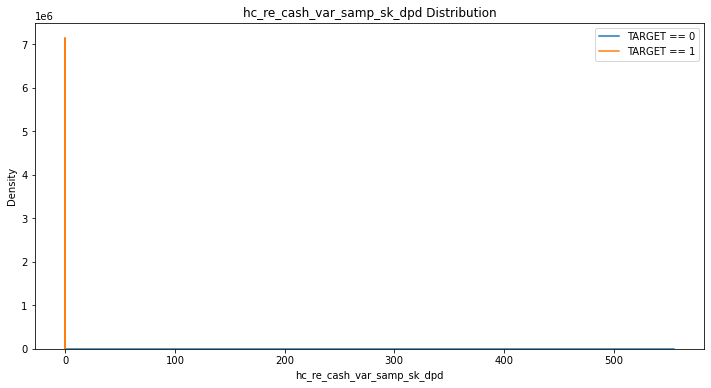

In [354]:
kde_target('hc_re_cash_var_samp_sk_dpd', app_train)

In [355]:
app_train['hc_re_cash_var_samp_sk_dpd'].isnull().sum()

0

### hc_re_cash_variance_samp_sk_dpd

In [356]:
app_train[['TARGET', 'hc_re_cash_variance_samp_sk_dpd']].corr()

,TARGET,hc_re_cash_variance_samp_sk_dpd
TARGET,1.000000,-0.000534
hc_re_cash_variance_samp_sk_dpd,-0.000534,1.000000


The correlation between hc_re_cash_variance_samp_sk_dpd and the TARGET is -0.0005
Median value for loan that was not repaid = -0.0018
Median value for loan that was repaid =     -0.0018


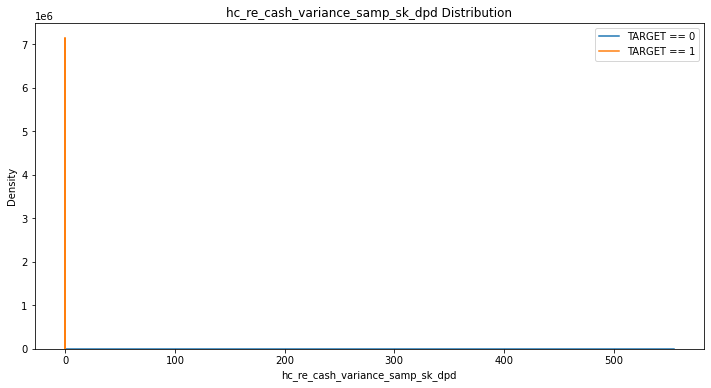

In [357]:
kde_target('hc_re_cash_variance_samp_sk_dpd', app_train)

In [358]:
app_train['hc_re_cash_variance_samp_sk_dpd'].isnull().sum()

0

## CSVをEXPORT

In [359]:
app_train['SK_ID_CURR'] = app_train[["SK_ID_CURR"]].astype(int) 
app_test['SK_ID_CURR'] = app_test[["SK_ID_CURR"]].astype(int)
app_test.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_HOUSING_TYPE_House / apartment,NAME_TYPE_SUITE_Unaccompanied,NAME_EDUCATION_TYPE_Secondary / secondary special,REG_CITY_NOT_WORK_CITY,CODE_GENDER_F,FONDKAPREMONT_MODE_nan,FLAG_OWN_REALTY_Y,FLAG_PHONE,FLAG_OWN_CAR_N,...,hc_re_cash_max_sk_dpd,hc_re_cash_min_sk_dpd,hc_re_cash_sum_sk_dpd,hc_re_cash_avg_sk_dpd,hc_re_cash_cnt_sk_dpd,hc_re_cash_stddev_sk_dpd,hc_re_cash_stddev_pop_sk_dpd,hc_re_cash_var_pop_sk_dpd,hc_re_cash_var_samp_sk_dpd,hc_re_cash_variance_samp_sk_dpd
0,1,1,1,0,-0.547236,1,1,1,-0.625259,1,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
1,1,1,1,1,-0.547236,0,1,1,-0.625259,1,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
2,1,1,0,0,-0.547236,0,1,1,-0.625259,0,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
3,1,1,1,1,-0.547236,1,0,1,1.599337,1,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
4,1,1,1,1,1.827367,0,1,0,-0.625259,0,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803


In [360]:
app_train.head()

,TARGET,NAME_CONTRACT_TYPE_Cash loans,NAME_HOUSING_TYPE_House / apartment,NAME_TYPE_SUITE_Unaccompanied,NAME_EDUCATION_TYPE_Secondary / secondary special,REG_CITY_NOT_WORK_CITY,CODE_GENDER_F,FONDKAPREMONT_MODE_nan,FLAG_OWN_REALTY_Y,FLAG_PHONE,...,hc_re_cash_max_sk_dpd,hc_re_cash_min_sk_dpd,hc_re_cash_sum_sk_dpd,hc_re_cash_avg_sk_dpd,hc_re_cash_cnt_sk_dpd,hc_re_cash_stddev_sk_dpd,hc_re_cash_stddev_pop_sk_dpd,hc_re_cash_var_pop_sk_dpd,hc_re_cash_var_samp_sk_dpd,hc_re_cash_variance_samp_sk_dpd
0,1.0,1,1,1,1,-0.547236,0,0,1,1.599337,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
1,0.0,1,1,0,0,-0.547236,1,0,0,1.599337,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
2,0.0,0,1,1,1,-0.547236,0,1,1,1.599337,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
3,0.0,1,1,1,1,-0.547236,1,1,1,-0.625259,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
4,0.0,1,1,1,1,1.827367,0,1,1,-0.625259,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803


In [361]:
remove_columns = list(app_test_origin.columns)
remove_columns.remove('SK_ID_CURR')
remove_columns

['NAME_CONTRACT_TYPE_Cash loans',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'REG_CITY_NOT_WORK_CITY',
 'CODE_GENDER_F',
 'FONDKAPREMONT_MODE_nan',
 'FLAG_OWN_REALTY_Y',
 'FLAG_PHONE',
 'FLAG_OWN_CAR_N',
 'FLAG_DOCUMENT_3',
 'NAME_FAMILY_STATUS_Married',
 'CNT_CHILDREN',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'REG_CITY_NOT_LIVE_CITY',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EMERGENCYSTATE_MODE_No',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'NAME_INCOME_TYPE_Working',
 'HOUSETYPE_MODE_block of flats',
 'HOUSETYPE_MODE_nan',
 'WALLSMATERIAL_MODE_nan',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'EXT_SOURCE_3',
 'EMERGENCYSTATE_MODE_nan',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_ANNUITY',
 'FLAG_EMAIL',
 'LIVE_REGION_NOT_WORK_REGION',
 'EXT

In [362]:
app_train.drop(remove_columns, axis=1, inplace=True)
app_test.drop(remove_columns, axis=1, inplace=True)
app_br_train = app_train.copy()
app_br_test = app_test.copy()
app_br_test.head()

,SK_ID_CURR,hc_re_cash_max_amt_annuity,hc_re_cash_min_amt_annuity,hc_re_cash_sum_amt_annuity,hc_re_cash_avg_amt_annuity,hc_re_cash_cnt_amt_annuity,hc_re_cash_stddev_amt_annuity,hc_re_cash_stddev_pop_amt_annuity,hc_re_cash_var_pop_amt_annuity,hc_re_cash_var_samp_amt_annuity,...,hc_re_cash_max_sk_dpd,hc_re_cash_min_sk_dpd,hc_re_cash_sum_sk_dpd,hc_re_cash_avg_sk_dpd,hc_re_cash_cnt_sk_dpd,hc_re_cash_stddev_sk_dpd,hc_re_cash_stddev_pop_sk_dpd,hc_re_cash_var_pop_sk_dpd,hc_re_cash_var_samp_sk_dpd,hc_re_cash_variance_samp_sk_dpd
0,100001,0.408496,0.236808,1.101622,0.297041,1.979030,0.734181,0.009456,0.019053,0.019055,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
1,100005,0.072642,-0.139846,0.710010,-0.051668,1.825263,0.540350,0.009399,0.019052,0.019053,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
2,100013,0.785583,0.653115,1.541777,0.686859,2.151977,0.952772,0.009481,0.019054,0.019056,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
3,100028,1.087399,0.981830,1.894413,0.997692,2.290528,1.128394,0.009520,0.019055,0.019057,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
4,100038,0.840840,0.713582,1.606316,0.743843,2.177337,0.984881,0.009476,0.019054,0.019056,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803


In [363]:
### train
#app_train.to_csv(
#    path_or_buf="./home-credit-default-risk/exports/hc_only-rev-cash_train_axis-24.csv", # 出力先
#    sep=",",                                            # 区切り文字
#    index=False,                                        # indexの出力有無
#    header=True                                        # headerの出力有無
#)

In [364]:
### test
#app_test.to_csv(
#    path_or_buf="./home-credit-default-risk/exports/hc_only-rev-cash_test_axis-24.csv", # 出力先
#    sep=",",                                            # 区切り文字
#    index=False,                                        # indexの出力有無
#    header=True                                        # headerの出力有無
#)

In [365]:
columns = list(app_train.columns)
columns.remove('SK_ID_CURR')
columns.remove('TARGET')

In [366]:
data = pd.concat([app_train, app_test], sort=False)
train = data[:len(app_train)]
test = data[len(app_test):]


y_train = train['TARGET']
X_train = app_train.copy().drop('TARGET', axis=1)
X_test = app_test.copy()

In [367]:
import xgboost as xgb
from sklearn.metrics import log_loss

y_preds = []
models = []
scores = []
oof_train = np.zeros((len(X_train),))
cv = KFold(n_splits=5, shuffle=True, random_state=0)

categorical_features = columns

params = {
    'booster': 'gbtree'
    ,'objective': 'binary:logistic'
    ,'silent': 1
    ,'random_state': 17
    ,'gpu_id': 0
    ,'tree_method': 'gpu_hist'
    ,'eval_metric': 'auc'
    ,'eta': 0.1
    #,'max_round': 100
    ,'max_depth': 8
    ,'subsample': 0.8
    ,'colsample_state': 71
    ,'colsample_bytree': 1.0
    ,'colsample_bylevel': 0.3
    ,'subsumple': 0.9
    ,'gamma': 0
    ,'lambda': 1
    ,'alpha': 0
    ,'min_child_weight': 1
}

num_round = 50

for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index, :]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train[train_index]
    y_val = y_train[valid_index]
    
    dtrain = xgb.DMatrix(X_tr, label=y_tr)
    dvalid = xgb.DMatrix(X_val, label=y_val)
    dtest = xgb.DMatrix(X_test)
    
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    model = xgb.train(params, dtrain, num_round, evals=watchlist)
    
    va_pred = model.predict(dvalid)
    score = log_loss(y_val, va_pred)
    oof_train[valid_index] = va_pred
    
    y_pred = model.predict(dtest) 
    
    
    #oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)
    #y_pred = model.predict(X_test, num_iteration=model.best_iteration)##

    y_preds.append(y_pred)
    models.append(model)
    scores.append(score)

[19:13:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_state", "silent", "subsumple" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.59035	eval-auc:0.58409
[1]	train-auc:0.59581	eval-auc:0.59033
[2]	train-auc:0.59937	eval-auc:0.59225
[3]	train-auc:0.60198	eval-auc:0.59177
[4]	train-auc:0.60341	eval-auc:0.59063
[5]	train-auc:0.60637	eval-auc:0.59073
[6]	train-auc:0.60843	eval-auc:0.59162
[7]	train-auc:0.61006	eval-auc:0.59227
[8]	train-auc:0.61294	eval-auc:0.59283
[9]	train-auc:0.61433	eval-auc:0.59234
[10]	train-auc:0.61764	eval-auc:0.59270
[11]	train-auc:0.62039	eval-auc:0.59366
[12]	train-auc:0.62190	eval-auc:0.59354
[13]	train-auc:0.62327	eval-auc:0.59375
[14

[11]	train-auc:0.62067	eval-auc:0.58151
[12]	train-auc:0.62321	eval-auc:0.58169
[13]	train-auc:0.62537	eval-auc:0.58312
[14]	train-auc:0.62688	eval-auc:0.58287
[15]	train-auc:0.62786	eval-auc:0.58305
[16]	train-auc:0.62922	eval-auc:0.58268
[17]	train-auc:0.63139	eval-auc:0.58279
[18]	train-auc:0.63278	eval-auc:0.58194
[19]	train-auc:0.63316	eval-auc:0.58196
[20]	train-auc:0.63449	eval-auc:0.58217
[21]	train-auc:0.63573	eval-auc:0.58208
[22]	train-auc:0.63658	eval-auc:0.58251
[23]	train-auc:0.63778	eval-auc:0.58263
[24]	train-auc:0.63845	eval-auc:0.58225
[25]	train-auc:0.63911	eval-auc:0.58247
[26]	train-auc:0.63998	eval-auc:0.58233
[27]	train-auc:0.64120	eval-auc:0.58243
[28]	train-auc:0.64243	eval-auc:0.58310
[29]	train-auc:0.64356	eval-auc:0.58280
[30]	train-auc:0.64492	eval-auc:0.58287
[31]	train-auc:0.64575	eval-auc:0.58295
[32]	train-auc:0.64644	eval-auc:0.58292
[33]	train-auc:0.64725	eval-auc:0.58272
[34]	train-auc:0.64862	eval-auc:0.58282
[35]	train-auc:0.64980	eval-auc:0.58277


In [368]:
remove_columns = ['TARGET']
app_br_train.drop(remove_columns, axis=1, inplace=True)
app_br_train.head()

,SK_ID_CURR,hc_re_cash_max_amt_annuity,hc_re_cash_min_amt_annuity,hc_re_cash_sum_amt_annuity,hc_re_cash_avg_amt_annuity,hc_re_cash_cnt_amt_annuity,hc_re_cash_stddev_amt_annuity,hc_re_cash_stddev_pop_amt_annuity,hc_re_cash_var_pop_amt_annuity,hc_re_cash_var_samp_amt_annuity,...,hc_re_cash_max_sk_dpd,hc_re_cash_min_sk_dpd,hc_re_cash_sum_sk_dpd,hc_re_cash_avg_sk_dpd,hc_re_cash_cnt_sk_dpd,hc_re_cash_stddev_sk_dpd,hc_re_cash_stddev_pop_sk_dpd,hc_re_cash_var_pop_sk_dpd,hc_re_cash_var_samp_sk_dpd,hc_re_cash_variance_samp_sk_dpd
0,100002,-0.550225,-0.525635,-0.497174,-0.544356,-0.063732,-0.474759,0.009246,0.019042,0.019044,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
1,100003,1.040302,1.019123,0.945304,1.035837,0.181215,0.936643,0.009477,0.019069,0.019071,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
2,100004,-1.920536,-1.935616,-1.729480,-1.928740,-0.676947,-1.789408,0.008311,-0.087239,-0.087163,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
3,100006,0.211104,0.223992,0.192042,0.215073,0.274399,0.202340,0.009361,0.019056,0.019057,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
4,100007,0.006586,0.024645,0.006641,0.011678,0.220324,0.020832,0.009336,0.019052,0.019054,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803


In [369]:
# trainへマージ
app_train = pd.merge(app_train_origin.copy(), app_br_train, on='SK_ID_CURR', how='left')
# testへマージ
app_test = pd.merge(app_test_origin.copy(), app_br_test, on='SK_ID_CURR', how='left')
app_train.head()

,TARGET,NAME_CONTRACT_TYPE_Cash loans,NAME_HOUSING_TYPE_House / apartment,NAME_TYPE_SUITE_Unaccompanied,NAME_EDUCATION_TYPE_Secondary / secondary special,REG_CITY_NOT_WORK_CITY,CODE_GENDER_F,FONDKAPREMONT_MODE_nan,FLAG_OWN_REALTY_Y,FLAG_PHONE,...,hc_re_cash_max_sk_dpd,hc_re_cash_min_sk_dpd,hc_re_cash_sum_sk_dpd,hc_re_cash_avg_sk_dpd,hc_re_cash_cnt_sk_dpd,hc_re_cash_stddev_sk_dpd,hc_re_cash_stddev_pop_sk_dpd,hc_re_cash_var_pop_sk_dpd,hc_re_cash_var_samp_sk_dpd,hc_re_cash_variance_samp_sk_dpd
0,1.0,1,1,1,1,-0.547236,0,0,1,1.599337,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
1,0.0,1,1,0,0,-0.547236,1,0,0,1.599337,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
2,0.0,0,1,1,1,-0.547236,0,1,1,1.599337,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
3,0.0,1,1,1,1,-0.547236,1,1,1,-0.625259,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
4,0.0,1,1,1,1,1.827367,0,1,1,-0.625259,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803


In [370]:
columns = list(app_train.columns)
columns

['TARGET',
 'NAME_CONTRACT_TYPE_Cash loans',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'REG_CITY_NOT_WORK_CITY',
 'CODE_GENDER_F',
 'FONDKAPREMONT_MODE_nan',
 'FLAG_OWN_REALTY_Y',
 'FLAG_PHONE',
 'FLAG_OWN_CAR_N',
 'FLAG_DOCUMENT_3',
 'NAME_FAMILY_STATUS_Married',
 'CNT_CHILDREN',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'REG_CITY_NOT_LIVE_CITY',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EMERGENCYSTATE_MODE_No',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'NAME_INCOME_TYPE_Working',
 'HOUSETYPE_MODE_block of flats',
 'HOUSETYPE_MODE_nan',
 'WALLSMATERIAL_MODE_nan',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'EXT_SOURCE_3',
 'EMERGENCYSTATE_MODE_nan',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_ANNUITY',
 'FLAG_EMAIL',
 'LIVE_REGION_NOT_WORK_REG

In [371]:
columns = list(app_train.columns)
columns.remove('SK_ID_CURR')
columns.remove('TARGET')

In [372]:
data = pd.concat([app_train, app_test], sort=False)
train = data[:len(app_train)]
test = data[len(app_test):]

y_train = train['TARGET']
X_train = app_train.copy().drop('TARGET', axis=1)
X_test = app_test.copy()

In [373]:
import xgboost as xgb
from sklearn.metrics import log_loss

y_preds = []
models = []
scores = []
oof_train = np.zeros((len(X_train),))
cv = KFold(n_splits=5, shuffle=True, random_state=0)

categorical_features = columns

params = {
    'booster': 'gbtree'
    ,'objective': 'binary:logistic'
    ,'silent': 1
    ,'random_state': 17
    ,'gpu_id': 0
    ,'tree_method': 'gpu_hist'
    ,'eval_metric': 'auc'
    ,'eta': 0.1
    #,'max_round': 100
    ,'max_depth': 8
    ,'subsample': 0.8
    ,'colsample_state': 71
    ,'colsample_bytree': 1.0
    ,'colsample_bylevel': 0.3
    ,'subsumple': 0.9
    ,'gamma': 0
    ,'lambda': 1
    ,'alpha': 0
    ,'min_child_weight': 1
}

num_round = 50

for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index, :]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train[train_index]
    y_val = y_train[valid_index]
    
    dtrain = xgb.DMatrix(X_tr, label=y_tr)
    dvalid = xgb.DMatrix(X_val, label=y_val)
    dtest = xgb.DMatrix(X_test)
    
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    model = xgb.train(params, dtrain, num_round, evals=watchlist)
    
    va_pred = model.predict(dvalid)
    score = log_loss(y_val, va_pred)
    oof_train[valid_index] = va_pred
    
    y_pred = model.predict(dtest) 
    
    y_preds.append(y_pred)
    models.append(model)
    scores.append(score)

[19:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_state", "silent", "subsumple" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.72763	eval-auc:0.70508
[1]	train-auc:0.74542	eval-auc:0.72097
[2]	train-auc:0.75087	eval-auc:0.72698
[3]	train-auc:0.75560	eval-auc:0.72885
[4]	train-auc:0.75827	eval-auc:0.73103
[5]	train-auc:0.76067	eval-auc:0.73217
[6]	train-auc:0.76286	eval-auc:0.73342
[7]	train-auc:0.76625	eval-auc:0.73494
[8]	train-auc:0.76806	eval-auc:0.73514
[9]	train-auc:0.76978	eval-auc:0.73664
[10]	train-auc:0.77188	eval-auc:0.73726
[11]	train-auc:0.77286	eval-auc:0.73805
[12]	train-auc:0.77492	eval-auc:0.73866
[13]	train-auc:0.77631	eval-auc:0.73876
[14

[12]	train-auc:0.77693	eval-auc:0.73658
[13]	train-auc:0.77860	eval-auc:0.73653
[14]	train-auc:0.77987	eval-auc:0.73703
[15]	train-auc:0.78082	eval-auc:0.73776
[16]	train-auc:0.78221	eval-auc:0.73799
[17]	train-auc:0.78407	eval-auc:0.73861
[18]	train-auc:0.78512	eval-auc:0.73856
[19]	train-auc:0.78637	eval-auc:0.73878
[20]	train-auc:0.78744	eval-auc:0.73908
[21]	train-auc:0.78915	eval-auc:0.73981
[22]	train-auc:0.79039	eval-auc:0.73999
[23]	train-auc:0.79236	eval-auc:0.74093
[24]	train-auc:0.79390	eval-auc:0.74128
[25]	train-auc:0.79516	eval-auc:0.74147
[26]	train-auc:0.79628	eval-auc:0.74187
[27]	train-auc:0.79759	eval-auc:0.74246
[28]	train-auc:0.79896	eval-auc:0.74307
[29]	train-auc:0.80076	eval-auc:0.74306
[30]	train-auc:0.80207	eval-auc:0.74315
[31]	train-auc:0.80336	eval-auc:0.74382
[32]	train-auc:0.80484	eval-auc:0.74432
[33]	train-auc:0.80622	eval-auc:0.74421
[34]	train-auc:0.80860	eval-auc:0.74485
[35]	train-auc:0.81002	eval-auc:0.74478
[36]	train-auc:0.81164	eval-auc:0.74495


In [374]:
# CSV-00
submit_all = app_test[["SK_ID_CURR"]].copy()
# 予測確率の変数名はTARGET
submit_all["TARGET"] = y_preds[0]
submit_all.isnull().sum()

# Submit File
submit_all.to_csv(
    path_or_buf="./home-credit-default-risk/submit/submit_all_00.csv", # 出力先
    sep=",",                                            # 区切り文字
    index=False,                                        # indexの出力有無
    header=True                                        # headerの出力有無
)

In [375]:
# CSV-01
submit_all = app_test[["SK_ID_CURR"]].copy()
# 予測確率の変数名はTARGET
submit_all["TARGET"] = y_preds[1]

# Submit File
submit_all.to_csv(
    path_or_buf="./home-credit-default-risk/submit/submit_all_01.csv", # 出力先
    sep=",",                                            # 区切り文字
    index=False,                                        # indexの出力有無
    header=True                                        # headerの出力有無
)

In [376]:
# CSV-02
submit_all = app_test[["SK_ID_CURR"]].copy()
# 予測確率の変数名はTARGET
submit_all["TARGET"] = y_preds[2]

# Submit File
submit_all.to_csv(
    path_or_buf="./home-credit-default-risk/submit/submit_all_02.csv", # 出力先
    sep=",",                                            # 区切り文字
    index=False,                                        # indexの出力有無
    header=True                                        # headerの出力有無
)

In [377]:
# CSV-03
submit_all = app_test[["SK_ID_CURR"]].copy()
# 予測確率の変数名はTARGET
submit_all["TARGET"] = y_preds[3]

# Submit File
submit_all.to_csv(
    path_or_buf="./home-credit-default-risk/submit/submit_all_03.csv", # 出力先
    sep=",",                                            # 区切り文字
    index=False,                                        # indexの出力有無
    header=True                                        # headerの出力有無
)

In [378]:
# CSV-04
submit_all = app_test[["SK_ID_CURR"]].copy()
# 予測確率の変数名はTARGET
submit_all["TARGET"] = y_preds[4]

# Submit File
submit_all.to_csv(
    path_or_buf="./home-credit-default-risk/submit/submit_all_04.csv", # 出力先
    sep=",",                                            # 区切り文字
    index=False,                                        # indexの出力有無
    header=True                                        # headerの出力有無
)

In [379]:
submit_all_00 = pd.read_csv('./home-credit-default-risk/submit/submit_all_00.csv')
submit_all_01 = pd.read_csv('./home-credit-default-risk/submit/submit_all_01.csv')
submit_all_02 = pd.read_csv('./home-credit-default-risk/submit/submit_all_02.csv')
submit_all_03 = pd.read_csv('./home-credit-default-risk/submit/submit_all_03.csv')
submit_all_04 = pd.read_csv('./home-credit-default-risk/submit/submit_all_04.csv')

In [380]:
submit_all = pd.DataFrame({
    'submit_all_00': submit_all_00['TARGET'].values
    ,'submit_all_01': submit_all_01['TARGET'].values
    ,'submit_all_02': submit_all_02['TARGET'].values
    ,'submit_all_03': submit_all_03['TARGET'].values
    ,'submit_all_04': submit_all_04['TARGET'].values
    })
submit_all.head()

,submit_all_00,submit_all_01,submit_all_02,submit_all_03,submit_all_04
0,0.042906,0.079019,0.051608,0.043630,0.052515
1,0.118561,0.130610,0.190374,0.148023,0.157157
2,0.028359,0.025125,0.032985,0.039606,0.024137
3,0.048880,0.045868,0.053403,0.047161,0.033078
4,0.155106,0.165527,0.145572,0.148714,0.120282


In [381]:
submit_all = app_test[["SK_ID_CURR"]].astype(int).copy()
submit_all['TARGET'] = (submit_all_00['TARGET'] + submit_all_01['TARGET'] + submit_all_02['TARGET'] + submit_all_03['TARGET'] + submit_all_04['TARGET'])/5
submit_all.head()

,SK_ID_CURR,TARGET
0,100001,0.053936
1,100005,0.148945
2,100013,0.030043
3,100028,0.045678
4,100038,0.147040


In [382]:
#submit_all['TARGET'] = (submit_all['TARGET'] / 5)
#submit_all.to_csv('./home-credit-default-risk/submit/submit_hc_only-rev-cash_test_axis-24.csv', index=False)
#submit_all.head()

In [383]:
submit_all.count()

SK_ID_CURR    48744
TARGET        48744
dtype: int64